In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os

In [6]:
file_path = '/Users/yongchanchun/Desktop/MacBook_Pro_Desktop/TAVE/머신러닝/DACON/여행_상품_신청_여부/data'
submission_path = 'sample_submission.csv'
train_path = 'train.csv'
test_path = 'test.csv'

In [248]:
train_df = pd.read_csv(os.path.join(file_path, train_path), index_col = 'id')
test_df = pd.read_csv(os.path.join(file_path, test_path), index_col = 'id')
sub_file = pd.read_csv(os.path.join(file_path, submission_path), index_col = 'id')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 1 to 1955
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1861 non-null   float64
 1   TypeofContact             1945 non-null   object 
 2   CityTier                  1955 non-null   int64  
 3   DurationOfPitch           1853 non-null   float64
 4   Occupation                1955 non-null   object 
 5   Gender                    1955 non-null   object 
 6   NumberOfPersonVisiting    1955 non-null   int64  
 7   NumberOfFollowups         1942 non-null   float64
 8   ProductPitched            1955 non-null   object 
 9   PreferredPropertyStar     1945 non-null   float64
 10  MaritalStatus             1955 non-null   object 
 11  NumberOfTrips             1898 non-null   float64
 12  Passport                  1955 non-null   int64  
 13  PitchSatisfactionScore    1955 non-null   int64  
 14  OwnCar  

In [34]:
train_df

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
id,,,,,,,,,,,,,,,,,,,
1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0


In [14]:
train_df.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

In [33]:
num_na = []
for col in train_df.columns:
    num_na.append(train_df[train_df[col].isna()].shape[0])
num_na

[94, 10, 0, 102, 0, 0, 0, 13, 0, 10, 0, 57, 0, 0, 0, 27, 0, 100, 0]

## 결측치를 제거하지 않은 상태로 GBDT를 적용해보자
1. lightgbm 사용
2. xgboost 사용

In [ ]:
train_df_all_label_encoded = pd.DataFrame()
# transform all object columns with labelencoder
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(train_df[col])
        train_df_all_label_encoded[col] = le.transform(train_df[col])
    else:
        train_df_all_label_encoded[col] = train_df[col]

In [91]:
test_df_all_label_encoded = pd.DataFrame()
# transform all object columns with labelencoder
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(test_df[col])
        test_df_all_label_encoded[col] = le.transform(test_df[col])
    else:
        test_df_all_label_encoded[col] = test_df[col]

In [92]:
test_df_all_label_encoded

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
id,,,,,,,,,,,,,,,,,,
1,32.0,0,3,NaN,3,2,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
2,46.0,1,2,11.0,3,2,3,NaN,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
3,37.0,1,3,22.0,3,2,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
4,43.0,1,1,36.0,3,2,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
5,25.0,1,3,7.0,1,1,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,54.0,1,1,6.0,3,1,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2931,33.0,0,1,31.0,2,2,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0


In [94]:
sub_file

,ProdTaken
id,
1,0
2,0
3,0
4,0
5,0
...,...
2929,0
2930,0
2931,0


### 1. lightgbm 사용

In [96]:
import lightgbm as lgb

train_x = train_df_all_label_encoded.drop(['ProdTaken'], axis = 1)
train_y = train_df_all_label_encoded['ProdTaken']
lightgbm_model =lgb.LGBMClassifier(random_state=777, n_estimators=1000)
lightgbm_model.fit(train_x, train_y)


LGBMClassifier(n_estimators=1000, random_state=777)

In [102]:
sub_file['ProdTaken'] = lightgbm_model.predict(test_df_all_label_encoded)
file_name = 'lightgbm_with_null_result.csv'
sub_file.to_csv(os.path.join(file_path, file_name))

### 2. xgboost 사용

In [103]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

In [158]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# 특징과 목적변수를 xgboost의 데이터 구조로 변환
dtrain = xgb.DMatrix(tr_x, label=tr_y)
dvalid = xgb.DMatrix(va_x, label=va_y)
dtest = xgb.DMatrix(test_df_all_label_encoded)


# 매개변수의 탐색범위
param_space = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eta': 0.1,
    'eval_metric': 'error',
    'min_child_weight': hp.quniform('min_child_weight', 1, 5, 1),
    'max_depth': hp.quniform('max_depth', 3, 9, 1),    
    'subsample': 0.8,
    'colsample_bytree': hp.quniform('subsample', 0.6, 0.95, 0.05),
    'gamma': hp.loguniform('gamma', np.log(1e-8), np.log(1.0)),
     # 여유가 있으면 alpha, lambda도 조정
    'alpha' : hp.loguniform('alpha', np.log(1e-8), np.log(1.0)),
    'lambda' : hp.loguniform('lambda', np.log(1e-6), np.log(10.0)),
    'random_state': 71

}

num_round=500
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

# define classifier
def classifier(value_list):
    result = []
    for value in value_list:
        if value > 0.5:
            result.append(1)
        else:
            result.append(0)
    result = np.array(result)
    return result
    
def score(params):
    # max_depth의 형을 정수형으로 수정
    params['max_depth'] = int(params['max_depth']) 
    model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=50)
    # model.fit(tr_x, tr_y)
    va_pred = model.predict(dvalid)
    print(type(va_pred), type(va_y))
    va_pred = classifier(va_pred)
    score = accuracy_score(va_y, va_pred)
    print(f'params: {params}, AS: {score:.4f}')

    # 정보를 기록
    history.append((params, score))

    return {'loss': score, 'status': STATUS_OK}


# hyperopt에 의한 매개변수 탐색 실행
max_evals = 15
trials = Trials()
history = []
fmin(score, param_space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

# 기록한 정보에서 매개변수와 점수를 출력
# (trials에서도 정보를 취득할 수 있지만 매개변수의 취득이 다소 어려움)
history = sorted(history, key=lambda tpl: tpl[1], reverse=True)
best = history[0]
print(f'best params:{best[0]}, score:{best[1]:.4f}')

[0]	train-error:0.15026	eval-error:0.16112                                      
[1]	train-error:0.13811	eval-error:0.16368                                      
[2]	train-error:0.13875	eval-error:0.15601                                      
[3]	train-error:0.13491	eval-error:0.15345                                      
[4]	train-error:0.12468	eval-error:0.15601                                      
[5]	train-error:0.12596	eval-error:0.15345                                      
[6]	train-error:0.12660	eval-error:0.15601                                      
[7]	train-error:0.12340	eval-error:0.16880                                      
[8]	train-error:0.11893	eval-error:0.15090                                      
[9]	train-error:0.11637	eval-error:0.14834                                      
[10]	train-error:0.11765	eval-error:0.15090                                     
[11]	train-error:0.11509	eval-error:0.14834                                     
[12]	train-error:0.11189	eva

[64]	train-error:0.06969	eval-error:0.13555                                     
[65]	train-error:0.06841	eval-error:0.13555                                     
[66]	train-error:0.06905	eval-error:0.13299                                     
[67]	train-error:0.06714	eval-error:0.13299                                     
[68]	train-error:0.06522	eval-error:0.13555                                     
[69]	train-error:0.06394	eval-error:0.13555                                     
[70]	train-error:0.06266	eval-error:0.13555                                     
[71]	train-error:0.06074	eval-error:0.13299                                     
[72]	train-error:0.06074	eval-error:0.13555                                     
[73]	train-error:0.06010	eval-error:0.13555                                     
[74]	train-error:0.05946	eval-error:0.13299                                     
[75]	train-error:0.05818	eval-error:0.13299                                     
[76]	train-error:0.05754	eva

[53]	train-error:0.12084	eval-error:0.13555                                     
[54]	train-error:0.11957	eval-error:0.13299                                     
[55]	train-error:0.11893	eval-error:0.13811                                     
[56]	train-error:0.11829	eval-error:0.13555                                     
[57]	train-error:0.11701	eval-error:0.13811                                     
[58]	train-error:0.11573	eval-error:0.13299                                     
[59]	train-error:0.11573	eval-error:0.13299                                     
[60]	train-error:0.11509	eval-error:0.13299                                     
[61]	train-error:0.11253	eval-error:0.13299                                     
[62]	train-error:0.11189	eval-error:0.13299                                     
[63]	train-error:0.11189	eval-error:0.12788                                     
[64]	train-error:0.11125	eval-error:0.12788                                     
[65]	train-error:0.10997	eva

[20]	train-error:0.10806	eval-error:0.14578                                     
[21]	train-error:0.10806	eval-error:0.14578                                     
[22]	train-error:0.10678	eval-error:0.14322                                     
[23]	train-error:0.10486	eval-error:0.14067                                     
[24]	train-error:0.10358	eval-error:0.13811                                     
[25]	train-error:0.10230	eval-error:0.13811                                     
[26]	train-error:0.10294	eval-error:0.13555                                     
[27]	train-error:0.10166	eval-error:0.14067                                     
[28]	train-error:0.09719	eval-error:0.13811                                     
[29]	train-error:0.09783	eval-error:0.14322                                     
[30]	train-error:0.09527	eval-error:0.14067                                     
[31]	train-error:0.09271	eval-error:0.14322                                     
[32]	train-error:0.09399	eva

[91]	train-error:0.08184	eval-error:0.13555                                     
[92]	train-error:0.08120	eval-error:0.13555                                     
[93]	train-error:0.08120	eval-error:0.13555                                     
[94]	train-error:0.08184	eval-error:0.13811                                     
[95]	train-error:0.07992	eval-error:0.14067                                     
[96]	train-error:0.07801	eval-error:0.14322                                     
[97]	train-error:0.07801	eval-error:0.14322                                     
[98]	train-error:0.07737	eval-error:0.14067                                     
[99]	train-error:0.07737	eval-error:0.14067                                     
[100]	train-error:0.07673	eval-error:0.14067                                    
<class 'numpy.ndarray'>                                                         
<class 'pandas.core.series.Series'>                                             
params: {'alpha': 7.23823790

[0]	train-error:0.14706	eval-error:0.16112                                      
[1]	train-error:0.14514	eval-error:0.15345                                      
[2]	train-error:0.14450	eval-error:0.15345                                      
[3]	train-error:0.14450	eval-error:0.15345                                      
[4]	train-error:0.14450	eval-error:0.15345                                      
[5]	train-error:0.14130	eval-error:0.15601                                      
[6]	train-error:0.13747	eval-error:0.16112                                      
[7]	train-error:0.14450	eval-error:0.15601                                      
[8]	train-error:0.13427	eval-error:0.15857                                      
[9]	train-error:0.13427	eval-error:0.15345                                      
[10]	train-error:0.13107	eval-error:0.15090                                     
[11]	train-error:0.12979	eval-error:0.15345                                     
[12]	train-error:0.13107	eva

[1]	train-error:0.14898	eval-error:0.16624                                      
[2]	train-error:0.14386	eval-error:0.15857                                      
[3]	train-error:0.14067	eval-error:0.15857                                      
[4]	train-error:0.14578	eval-error:0.15601                                      
[5]	train-error:0.13747	eval-error:0.15601                                      
[6]	train-error:0.13811	eval-error:0.14578                                      
[7]	train-error:0.13427	eval-error:0.14578                                      
[8]	train-error:0.13491	eval-error:0.14578                                      
[9]	train-error:0.13107	eval-error:0.14578                                      
[10]	train-error:0.13555	eval-error:0.14578                                     
[11]	train-error:0.13171	eval-error:0.14578                                     
[12]	train-error:0.12916	eval-error:0.14322                                     
[13]	train-error:0.12724	eva

[118]	train-error:0.02558	eval-error:0.13555                                    
[119]	train-error:0.02494	eval-error:0.13299                                    
[120]	train-error:0.02494	eval-error:0.13299                                    
[121]	train-error:0.02430	eval-error:0.13555                                    
[122]	train-error:0.02430	eval-error:0.13555                                    
[123]	train-error:0.02302	eval-error:0.13555                                    
[124]	train-error:0.02302	eval-error:0.13555                                    
[125]	train-error:0.02174	eval-error:0.13555                                    
[126]	train-error:0.01982	eval-error:0.13555                                    
[127]	train-error:0.01918	eval-error:0.13555                                    
[128]	train-error:0.01982	eval-error:0.13555                                    
[129]	train-error:0.01854	eval-error:0.13555                                    
[130]	train-error:0.01918	ev

[97]	train-error:0.04923	eval-error:0.13299                                     
[98]	train-error:0.04859	eval-error:0.13555                                     
[99]	train-error:0.04795	eval-error:0.13043                                     
[100]	train-error:0.04668	eval-error:0.13555                                    
[101]	train-error:0.04668	eval-error:0.13555                                    
[102]	train-error:0.04732	eval-error:0.13555                                    
[103]	train-error:0.04668	eval-error:0.13811                                    
[104]	train-error:0.04412	eval-error:0.13811                                    
[105]	train-error:0.04412	eval-error:0.13811                                    
[106]	train-error:0.04412	eval-error:0.14067                                    
[107]	train-error:0.04156	eval-error:0.13811                                    
[108]	train-error:0.03964	eval-error:0.13811                                    
[109]	train-error:0.04028	ev

In [159]:
params = {'alpha': 4.7007755374969665e-08, 'booster': 'gbtree', 'colsample_bytree': 0.7000000000000001, 'eta': 0.1, 'eval_metric': 'error', 'gamma': 0.2303522377913218, 'lambda': 0.00023255399132147476, 'max_depth': 8, 'min_child_weight': 4.0, 'objective': 'binary:logistic', 'random_state': 71, 'subsample': 0.8}

num_round = 500
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_round,
                  evals=watchlist,
                  early_stopping_rounds=50)

# 최적의 결정 트리의 개수로 예측
pred = model.predict(dtest, ntree_limit=model.best_ntree_limit)
pred = classifier(pred)

[0]	train-error:0.15026	eval-error:0.16112
[1]	train-error:0.13811	eval-error:0.16368
[2]	train-error:0.13875	eval-error:0.15601
[3]	train-error:0.13491	eval-error:0.15345
[4]	train-error:0.12468	eval-error:0.15601
[5]	train-error:0.12596	eval-error:0.15345
[6]	train-error:0.12660	eval-error:0.15601
[7]	train-error:0.12340	eval-error:0.16880
[8]	train-error:0.11893	eval-error:0.15090
[9]	train-error:0.11637	eval-error:0.14834
[10]	train-error:0.11765	eval-error:0.15090
[11]	train-error:0.11509	eval-error:0.14834
[12]	train-error:0.11189	eval-error:0.14834
[13]	train-error:0.11381	eval-error:0.14834
[14]	train-error:0.11317	eval-error:0.14322
[15]	train-error:0.10997	eval-error:0.14322
[16]	train-error:0.11125	eval-error:0.14322
[17]	train-error:0.11253	eval-error:0.14578
[18]	train-error:0.10806	eval-error:0.14067
[19]	train-error:0.10870	eval-error:0.14322
[20]	train-error:0.10742	eval-error:0.14322
[21]	train-error:0.10486	eval-error:0.13555
[22]	train-error:0.10294	eval-error:0.1329

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [163]:
sub_file['ProdTaken'] = pred
file_name = 'xgboost_result.csv'
sub_file.to_csv(os.path.join(file_path, file_name))

## 결측치를 제거한 상태로 GBDT를 적용해보자

## 결측치 하나씩 확인해보기
1. 결측치가 들어있는 열을 직접 확인해보기
2. 열마다 결측치를 처리할 적절한 방법 찾아보기

### 1. 결측치가 들어있는 열을 직접 확인해보기

In [46]:
col_names = train_df.columns
na_col = []
no_na_col = []
for i, num in enumerate(num_na):
    if num != 0:
        na_col.append(col_names[i])
    else:
        no_na_col.append(col_names[i])

train_df[na_col]        
        

,Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
id,,,,,,,,
1,28.0,Company Invited,10.0,4.0,3.0,3.0,1.0,20384.0
2,34.0,Self Enquiry,NaN,4.0,4.0,1.0,0.0,19599.0
3,45.0,Company Invited,NaN,3.0,4.0,2.0,0.0,NaN
4,29.0,Company Invited,7.0,5.0,4.0,3.0,1.0,21274.0
5,42.0,Self Enquiry,6.0,3.0,3.0,2.0,0.0,19907.0
...,...,...,...,...,...,...,...,...
1951,28.0,Self Enquiry,10.0,5.0,3.0,2.0,2.0,20723.0
1952,41.0,Self Enquiry,8.0,3.0,5.0,1.0,1.0,31595.0
1953,38.0,Company Invited,28.0,4.0,3.0,7.0,2.0,21651.0


In [49]:
train_df[na_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 1 to 1955
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1861 non-null   float64
 1   TypeofContact             1945 non-null   object 
 2   DurationOfPitch           1853 non-null   float64
 3   NumberOfFollowups         1942 non-null   float64
 4   PreferredPropertyStar     1945 non-null   float64
 5   NumberOfTrips             1898 non-null   float64
 6   NumberOfChildrenVisiting  1928 non-null   float64
 7   MonthlyIncome             1855 non-null   float64
dtypes: float64(7), object(1)
memory usage: 137.5+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

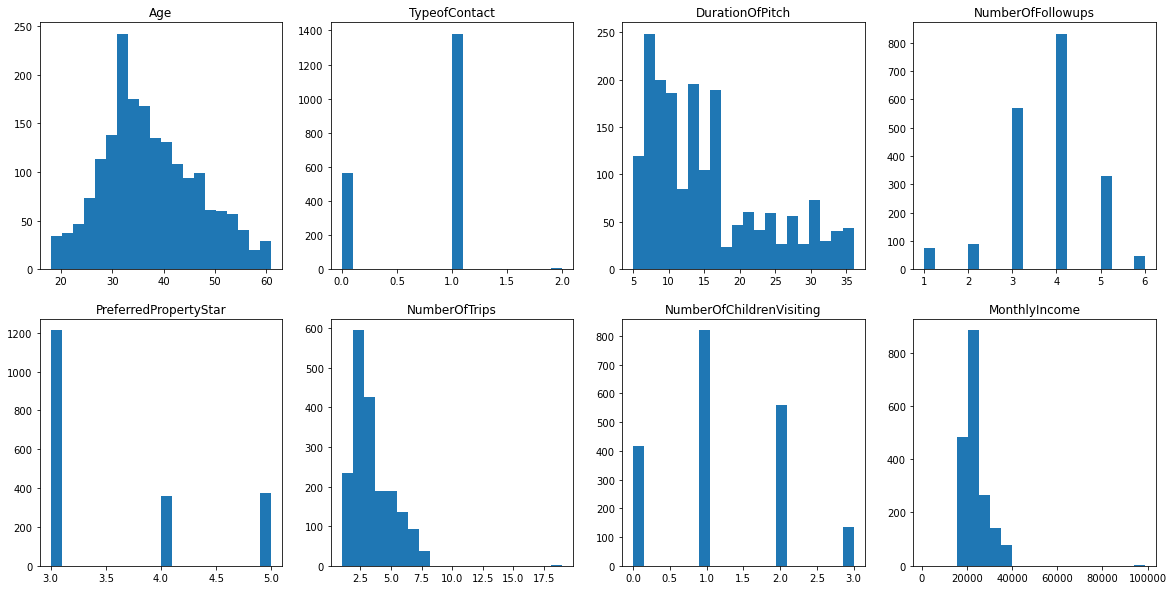

In [76]:
plt.figure(figsize=(20,10))
for i, col in enumerate(na_col, 1):
    row = int(np.sqrt(len(na_col)))
    plt.subplot(int(np.sqrt(len(na_col))), int(len(na_col)/row), i)
    plt.hist(train_df[col], bins=20)
    plt.title(col)
plt.show

In [278]:
train_df_all_label_encoded.describe()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
count,1861.000000,1955.000000,1955.000000,1853.000000,1955.000000,1955.000000,1955.000000,1942.000000,1955.000000,1945.000000,1955.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1955.000000,1855.000000,1955.000000
mean,37.462117,0.715601,1.641432,15.524015,2.338107,1.588747,2.922762,3.718332,1.172890,3.568638,1.275192,3.255532,0.291049,3.067519,0.619437,1.213174,1.731458,23624.108895,0.195908
std,9.189948,0.462445,0.908744,8.150057,0.627545,0.547326,0.712276,1.004095,1.270394,0.793196,0.933826,1.814698,0.454362,1.372915,0.485649,0.859450,0.954978,5640.482258,0.397000
min,18.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,31.000000,0.000000,1.000000,9.000000,2.000000,1.000000,2.000000,3.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,20390.000000,0.000000
50%,36.000000,1.000000,1.000000,14.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,22295.000000,0.000000
75%,43.000000,1.000000,3.000000,20.000000,3.000000,2.000000,3.000000,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,25558.000000,0.000000
max,61.000000,2.000000,3.000000,36.000000,3.000000,2.000000,5.000000,6.000000,4.000000,5.000000,3.000000,19.000000,1.000000,5.000000,1.000000,3.000000,4.000000,98678.000000,1.000000


In [269]:
train_df.head(10)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
id,,,,,,,,,,,,,,,,,,,
1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.000000,0
2,34.0,Self Enquiry,3,14.0,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.000000,1
3,45.0,Company Invited,1,14.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,18934.078264,0
4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.000000,1
5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.000000,0
6,32.0,Self Enquiry,1,29.0,Small Business,Male,4,4.0,Deluxe,3.0,Divorced,3.0,1,5,1,1.0,Manager,24857.000000,1
7,43.0,Company Invited,3,8.0,Salaried,Male,3,3.0,Deluxe,3.0,Married,2.0,0,3,1,2.0,Manager,20675.000000,0
8,32.0,Self Enquiry,3,20.0,Small Business,Male,4,5.0,Deluxe,5.0,Married,7.0,1,1,1,1.0,Manager,20980.000000,1
9,36.0,Company Invited,3,14.0,Small Business,Female,2,1.0,Deluxe,5.0,Divorced,3.0,0,1,1,0.0,Manager,19639.000000,0


In [168]:
train_df_all_label_encoded.corr(method = 'pearson')

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
Age,1.000000,0.003934,0.007875,0.025779,0.007857,-0.017126,0.010795,0.009834,0.482137,-0.026789,-0.095530,0.178143,0.030162,0.032860,0.060298,0.039495,0.204869,0.440733,-0.135832
TypeofContact,0.003934,1.000000,-0.006532,0.001507,0.017613,-0.011438,-0.004574,-0.061558,0.013177,0.035075,-0.043840,-0.000329,-0.036966,-0.042286,0.016879,-0.010283,0.025136,0.039107,-0.047598
CityTier,0.007875,-0.006532,1.000000,0.056010,0.159750,-0.042483,0.018071,0.023532,0.160561,-0.011882,0.016228,-0.020887,0.013665,-0.028168,0.014177,0.025359,0.141385,0.057705,0.085583
DurationOfPitch,0.025779,0.001507,0.056010,1.000000,0.057220,-0.007149,0.096268,0.039485,0.047093,-0.004448,0.011337,0.022236,0.043478,0.011926,-0.015087,0.047770,-0.008016,0.016011,0.072899
Occupation,0.007857,0.017613,0.159750,0.057220,1.000000,-0.009181,0.004642,-0.019433,0.031275,0.020325,-0.042706,-0.033575,-0.006072,-0.032450,-0.025941,0.002279,0.000432,0.005325,-0.042101
Gender,-0.017126,-0.011438,-0.042483,-0.007149,-0.009181,1.000000,0.001182,-0.045788,-0.072863,0.005142,-0.118900,0.026092,-0.022631,0.015859,-0.042304,0.025800,-0.068448,-0.043840,0.022398
NumberOfPersonVisiting,0.010795,-0.004574,0.018071,0.096268,0.004642,0.001182,1.000000,0.333738,-0.054800,0.017057,0.032742,0.214895,0.023638,-0.012981,0.018545,0.610193,-0.007937,0.168701,0.006483
NumberOfFollowups,0.009834,-0.061558,0.023532,0.039485,-0.019433,-0.045788,0.333738,1.000000,0.026845,-0.049151,0.089118,0.135183,-0.005332,-0.007195,0.051920,0.293942,0.057100,0.194668,0.105038
ProductPitched,0.482137,0.013177,0.160561,0.047093,0.031275,-0.072863,-0.054800,0.026845,1.000000,-0.006162,-0.059970,0.067993,-0.022497,-0.010217,0.086790,-0.027598,0.353400,0.648318,-0.150399
PreferredPropertyStar,-0.026789,0.035075,-0.011882,-0.004448,0.020325,0.005142,0.017057,-0.049151,-0.006162,1.000000,-0.004805,0.035064,0.014701,-0.019620,0.031355,0.027038,-0.018082,-0.024338,0.114923


### 2. 열마다 결측치를 처리할 적절한 방법 찾아보기
1. 여행상품을 신청하는 여부를 결정하는데 중요하게 작용하는 특징 확인하기

In [86]:
train_df_all_label_encoded = pd.DataFrame()
# transform all object columns with labelencoder
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(train_df[col])
        train_df_all_label_encoded[col] = le.transform(train_df[col])
    else:
        train_df_all_label_encoded[col] = train_df[col]

In [87]:
train_df_all_label_encoded

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
id,,,,,,,,,,,,,,,,,,,
1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
2,34.0,1,3,NaN,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
3,45.0,0,1,NaN,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,NaN,0
4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0


In [98]:
feature_values = pd.DataFrame(lightgbm_model.feature_importances_)
feature_columns = pd.DataFrame(train_x.columns)
feature_im = pd.concat([feature_values,feature_columns],axis=1)
feature_im.columns=['importance','column']
feature_im=feature_im.sort_values('importance',ascending=False)
feature_im # 랜덤포레스트 모델에서 특징중요도로 선택한 특징들을 확인

,importance,column
17,5180,MonthlyIncome
0,4222,Age
3,4014,DurationOfPitch
11,1542,NumberOfTrips
13,1394,PitchSatisfactionScore
9,1087,PreferredPropertyStar
10,1004,MaritalStatus
7,917,NumberOfFollowups
2,909,CityTier
12,804,Passport


2. monthlyincome, age, numberoftrips는 다른 변수로부터 결측값을 예측함 - LGBMRegressor

In [359]:
predict_na_col = ['MonthlyIncome', 'Age', 'NumberOfTrips']
for col in predict_na_col:
    na_idx = train_df[train_df[col].isna()].index
    na_idx = list(map(lambda x:x-1, na_idx))
    not_na_idx = train_df[list(map(lambda x:not x, train_df[col].isna()))].index
    not_na_idx = list(map(lambda x:x-1, not_na_idx))
    train_y = train_df_all_label_encoded.iloc[not_na_idx][col]
    train_x = train_df_all_label_encoded.iloc[not_na_idx].drop([col], axis=1) 
    feature_model =lgb.LGBMRegressor(random_state=777, n_estimators=1000)
    feature_model.fit(train_x, train_y)
    feature_pred = feature_model.predict(train_df_all_label_encoded.iloc[na_idx].drop([col], axis=1))
    train_df.loc[train_df[train_df[col].isna()].index,col] = feature_pred
    print(train_df[col].isnull().sum())

0
0


3. numberoffollowups, PreferredPropertyStar, NumberOfChildrenVisiting 는 다른 변수로 부터 값을 예측함 - LGBMClassifier

In [360]:
predict_na_col = ['NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting']
for col in predict_na_col:
    na_idx = train_df[train_df[col].isna()].index
    na_idx = list(map(lambda x:x-1, na_idx))
    not_na_idx = train_df[list(map(lambda x:not x, train_df[col].isna()))].index
    not_na_idx = list(map(lambda x:x-1, not_na_idx))
    train_y = train_df_all_label_encoded.iloc[not_na_idx][col]
    train_x = train_df_all_label_encoded.iloc[not_na_idx].drop([col], axis=1) 
    feature_model =lgb.LGBMClassifier(random_state=777, n_estimators=1000)
    feature_model.fit(train_x, train_y)
    feature_pred = feature_model.predict(train_df_all_label_encoded.iloc[na_idx].drop([col], axis=1))
    train_df.loc[train_df[train_df[col].isna()].index,col] = feature_pred
    print(train_df[train_df[col].isna()].shape)

(0, 19)
(0, 19)
(0, 19)


4. 'TypeofContact'는 다른 변수로 부터 값을 예측함 - LGBMClassifier

In [361]:
predict_na_col = ['TypeofContact']
for col in predict_na_col:
    na_idx = train_df[train_df[col].isna()].index
    na_idx = list(map(lambda x:x-1, na_idx))
    not_na_idx = train_df[list(map(lambda x:not x, train_df[col].isna()))].index
    not_na_idx = list(map(lambda x:x-1, not_na_idx))
    train_y = train_df_all_label_encoded.iloc[not_na_idx][col]
    train_x = train_df_all_label_encoded.iloc[not_na_idx].drop([col], axis=1) 
    feature_model =lgb.LGBMClassifier(random_state=777, n_estimators=1000)
    feature_model.fit(train_x, train_y)
    feature_pred = feature_model.predict(train_df_all_label_encoded.iloc[na_idx].drop([col], axis=1))
    back2col = lambda x: 'Company Invited' if x==0 else 'Self Enquiry'
    feature_pred = list(map(back2col, feature_pred))
    train_df.loc[train_df[train_df[col].isna()].index,col] = feature_pred
    print(train_df[train_df[col].isna()].shape)
    

(0, 19)


5. durationofpitch는 중앙값을 구함

In [362]:
med_val = np.median(train_df[train_df['DurationOfPitch'].isna().apply(lambda x:not x)]['DurationOfPitch'])
train_df.loc[train_df[train_df['DurationOfPitch'].isna()].index,'DurationOfPitch'] = med_val

In [363]:
train_df.isnull().sum()
# 모든 결측치 값 채워넣음

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [364]:
train_df

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
id,,,,,,,,,,,,,,,,,,,
1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.000000,0
2,34.0,Self Enquiry,3,14.0,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.000000,1
3,45.0,Company Invited,1,14.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,18934.078264,0
4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.000000,1
5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.000000,0
1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.000000,0
1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.000000,0


6. test data도 같은 방식으로 변환

In [352]:
test_df

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
id,,,,,,,,,,,,,,,,,,
1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,7.0,0,4,1,1.0,AVP,32328.0
2930,33.0,Self Enquiry,1,9.0,Small Business,Fe Male,4,2.0,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,23733.0
2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23987.0


In [353]:
predict_na_col = ['MonthlyIncome', 'Age', 'NumberOfTrips']
for col in predict_na_col:
    na_idx = test_df[test_df[col].isna()].index
    na_idx = list(map(lambda x:x-1, na_idx))
    not_na_idx = test_df[list(map(lambda x:not x, test_df[col].isna()))].index
    not_na_idx = list(map(lambda x:x-1, not_na_idx))
    test_y = test_df_all_label_encoded.iloc[not_na_idx][col]
    test_x = test_df_all_label_encoded.iloc[not_na_idx].drop([col], axis=1) 
    feature_model =lgb.LGBMRegressor(random_state=777, n_estimators=1000)
    feature_model.fit(test_x, test_y)
    feature_pred = feature_model.predict(test_df_all_label_encoded.iloc[na_idx].drop([col], axis=1))
    test_df.loc[test_df[test_df[col].isna()].index,col] = feature_pred
    print(test_df[col].isnull().sum())

0
0
0


In [354]:
predict_na_col = ['NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting']
for col in predict_na_col:
    na_idx = test_df[test_df[col].isna()].index
    na_idx = list(map(lambda x:x-1, na_idx))
    not_na_idx = test_df[list(map(lambda x:not x, test_df[col].isna()))].index
    not_na_idx = list(map(lambda x:x-1, not_na_idx))
    test_y = test_df_all_label_encoded.iloc[not_na_idx][col]
    test_x = test_df_all_label_encoded.iloc[not_na_idx].drop([col], axis=1) 
    feature_model =lgb.LGBMClassifier(random_state=777, n_estimators=1000)
    feature_model.fit(test_x, test_y)
    feature_pred = feature_model.predict(test_df_all_label_encoded.iloc[na_idx].drop([col], axis=1))
    test_df.loc[test_df[test_df[col].isna()].index,col] = feature_pred
    print(test_df[test_df[col].isna()].shape)

(0, 18)
(0, 18)
(0, 18)


In [355]:
predict_na_col = ['TypeofContact']
for col in predict_na_col:
    na_idx = test_df[test_df[col].isna()].index
    na_idx = list(map(lambda x:x-1, na_idx))
    not_na_idx = test_df[list(map(lambda x:not x, test_df[col].isna()))].index
    not_na_idx = list(map(lambda x:x-1, not_na_idx))
    test_y = test_df_all_label_encoded.iloc[not_na_idx][col]
    test_x = test_df_all_label_encoded.iloc[not_na_idx].drop([col], axis=1) 
    feature_model =lgb.LGBMClassifier(random_state=777, n_estimators=1000)
    feature_model.fit(test_x, test_y)
    feature_pred = feature_model.predict(test_df_all_label_encoded.iloc[na_idx].drop([col], axis=1))
    back2col = lambda x: 'Company Invited' if x==0 else 'Self Enquiry'
    feature_pred = list(map(back2col, feature_pred))
    test_df.loc[test_df[test_df[col].isna()].index,col] = feature_pred
    print(test_df[test_df[col].isna()].shape)

(0, 18)


In [356]:
med_val = np.median(test_df[test_df['DurationOfPitch'].isna().apply(lambda x:not x)]['DurationOfPitch'])
test_df.loc[test_df[test_df['DurationOfPitch'].isna()].index,'DurationOfPitch'] = med_val

## 3. 범주형 데이터 변환
### 타깃 인코딩 적용

In [313]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 1 to 1955
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1955 non-null   float64
 1   TypeofContact             1955 non-null   object 
 2   CityTier                  1955 non-null   int64  
 3   DurationOfPitch           1955 non-null   float64
 4   Occupation                1955 non-null   object 
 5   Gender                    1955 non-null   object 
 6   NumberOfPersonVisiting    1955 non-null   int64  
 7   NumberOfFollowups         1955 non-null   float64
 8   ProductPitched            1955 non-null   object 
 9   PreferredPropertyStar     1955 non-null   float64
 10  MaritalStatus             1955 non-null   object 
 11  NumberOfTrips             1955 non-null   float64
 12  Passport                  1955 non-null   int64  
 13  PitchSatisfactionScore    1955 non-null   int64  
 14  OwnCar  

In [376]:
train_df

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
id,,,,,,,,,,,,,,,,,,,
1,28.0,0.214797,1,10.0,0.201288,0.194292,3,0.189490,0.304348,0.161111,0.156944,3.0,0,1,0,0.212219,0.304348,20384.000000,0
2,34.0,0.182975,3,14.0,0.191803,0.185958,2,0.190852,0.131115,0.202290,0.333333,1.0,1,5,1,0.196203,0.131115,19599.000000,1
3,45.0,0.235955,1,14.0,0.186992,0.209354,2,0.193853,0.131115,0.202290,0.152022,2.0,0,4,1,0.196203,0.131115,18934.078264,0
4,29.0,0.235955,1,7.0,0.191803,0.209354,3,0.255144,0.305263,0.202290,0.152022,3.0,0,4,0,0.212264,0.305263,21274.000000,1
5,42.0,0.178161,3,6.0,0.183588,0.207087,2,0.171296,0.139489,0.161396,0.124138,2.0,0,3,1,0.175084,0.139489,19907.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,28.0,0.182975,1,10.0,0.191803,0.209354,3,0.255144,0.305263,0.169584,0.333333,2.0,0,1,1,0.170616,0.305263,20723.000000,0
1952,41.0,0.185115,3,8.0,0.183956,0.192607,3,0.170404,0.054348,0.270463,0.112676,1.0,0,5,1,0.200323,0.054348,31595.000000,0
1953,38.0,0.220096,3,28.0,0.187302,0.192607,3,0.202899,0.296763,0.159215,0.112676,7.0,0,2,1,0.183962,0.296763,21651.000000,0


In [382]:
train_df.describe()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
count,1955.000000,1955.000000,1955.000000,1955.000000,1954.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,37.278164,0.195677,1.641432,15.444501,0.195760,0.196090,2.922762,0.195825,0.195886,0.195774,0.195785,3.257109,0.291049,3.067519,0.619437,0.195522,0.195886,23409.566558,0.195908
std,9.058419,0.019337,0.908744,7.941725,0.030149,0.013235,0.712276,0.048581,0.084497,0.047377,0.080059,1.797209,0.454362,1.372915,0.485649,0.017981,0.084497,5580.593575,0.397000
min,18.000000,0.178161,1.000000,5.000000,0.179021,0.142857,1.000000,0.054054,0.054348,0.159215,0.109541,1.000000,0.000000,1.000000,0.000000,0.165865,0.054348,1000.000000,0.000000
25%,31.000000,0.182975,1.000000,9.000000,0.183588,0.192607,2.000000,0.177829,0.131021,0.161111,0.146515,2.000000,0.000000,2.000000,0.000000,0.183962,0.131021,20066.500000,0.000000
50%,36.000000,0.185115,1.000000,14.000000,0.186992,0.198020,3.000000,0.189490,0.154206,0.169584,0.155587,3.000000,0.000000,3.000000,1.000000,0.196203,0.154206,21969.000000,0.000000
75%,43.000000,0.214797,3.000000,19.000000,0.191803,0.207087,3.000000,0.202899,0.296763,0.223776,0.273171,4.000000,1.000000,4.000000,1.000000,0.212219,0.296763,25401.500000,0.000000
max,61.000000,0.235955,3.000000,36.000000,0.310924,0.209354,5.000000,0.400000,0.305263,0.288660,0.352273,19.000000,1.000000,5.000000,1.000000,0.247312,0.305263,98678.000000,1.000000


In [365]:
obj_col = []
for col in train_df.columns:
    # print(type(train_df[col].dtypes))
    if train_df[col].dtypes == 'object':
        obj_col.append(col)

categorical_col = ['CityTier', 'NumberOfPersonVisiting', 'Passport', 'PitchSatisfactionScore', 
                   'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting',
                  'OwnCar']
obj_col += categorical_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [367]:
from sklearn.model_selection import KFold


for c in obj_col:
    # target encode test data 
    data_tmp = pd.DataFrame({c:train_df[c], 'target': train_df['ProdTaken']})
    target_mean = data_tmp.groupby(c)['target'].mean()
    test_df[c] = test_df[c].map(target_mean)
    
    # target encode train data
    tmp = np.repeat(np.nan, train_df.shape[0])
    kf = KFold(n_splits=4, shuffle=True, random_state=72)
    for idx_1, idx_2 in kf.split(train_df):
        target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
        tmp[idx_2] = train_df[c].iloc[idx_2].map(target_mean)
        
    train_df[c] = tmp

In [385]:
test_df

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
id,,,,,,,,,,,,,,,,,,
1,32.0,0.225352,0.242268,13.0,0.191283,0.202154,0.200737,0.259819,0.130624,0.162829,0.152792,1.0,0.121212,0.133891,0.216398,0.206235,0.130624,19668.0
2,46.0,0.183850,0.266667,11.0,0.191283,0.202154,0.193320,0.178201,0.130624,0.217631,0.152792,1.0,0.377856,0.245431,0.216398,0.206235,0.130624,20021.0
3,37.0,0.183850,0.242268,22.0,0.191283,0.202154,0.193320,0.191617,0.130624,0.162829,0.152792,5.0,0.121212,0.245431,0.183320,0.189448,0.130624,21334.0
4,43.0,0.183850,0.169914,36.0,0.191283,0.202154,0.193320,0.361702,0.130624,0.162829,0.276596,6.0,0.121212,0.226316,0.183320,0.177193,0.130624,22950.0
5,25.0,0.183850,0.242268,7.0,0.288344,0.187861,0.201456,0.191617,0.299329,0.217631,0.276596,3.0,0.377856,0.175066,0.183320,0.231343,0.299329,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,54.0,0.183850,0.169914,6.0,0.191283,0.187861,0.200737,0.178201,0.076923,0.162829,0.332378,7.0,0.121212,0.175066,0.183320,0.206235,0.076923,32328.0
2930,33.0,0.183850,0.169914,9.0,0.191283,0.160714,0.201456,0.067416,0.130624,0.162829,0.276596,2.0,0.121212,0.226316,0.216398,0.206235,0.130624,23733.0
2931,33.0,0.225352,0.169914,31.0,0.183420,0.202154,0.201456,0.191617,0.130624,0.162829,0.117333,3.0,0.121212,0.175066,0.183320,0.206235,0.130624,23987.0


In [369]:
test_df.isnull().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## 4. 결측치 채움 + 타깃인코딩한 데이터에 GBDT 적용

In [386]:
import lightgbm as lgb

train_x = train_df.drop(['ProdTaken'], axis = 1)
train_y = train_df['ProdTaken']
lightgbm_model =lgb.LGBMClassifier(random_state=777, n_estimators=1000)
lightgbm_model.fit(train_x, train_y)

LGBMClassifier(n_estimators=1000, random_state=777)

In [387]:
sub_file['ProdTaken'] = lightgbm_model.predict(test_df)
file_name = 'lightgbm_without_null_result.csv'
sub_file.to_csv(os.path.join(file_path, file_name))

#### 성능이 결측치 채움 + 타깃인코딩한 데이터에서 더 좋지 않음

## 5. 신경망 

<function matplotlib.pyplot.show(close=None, block=None)>

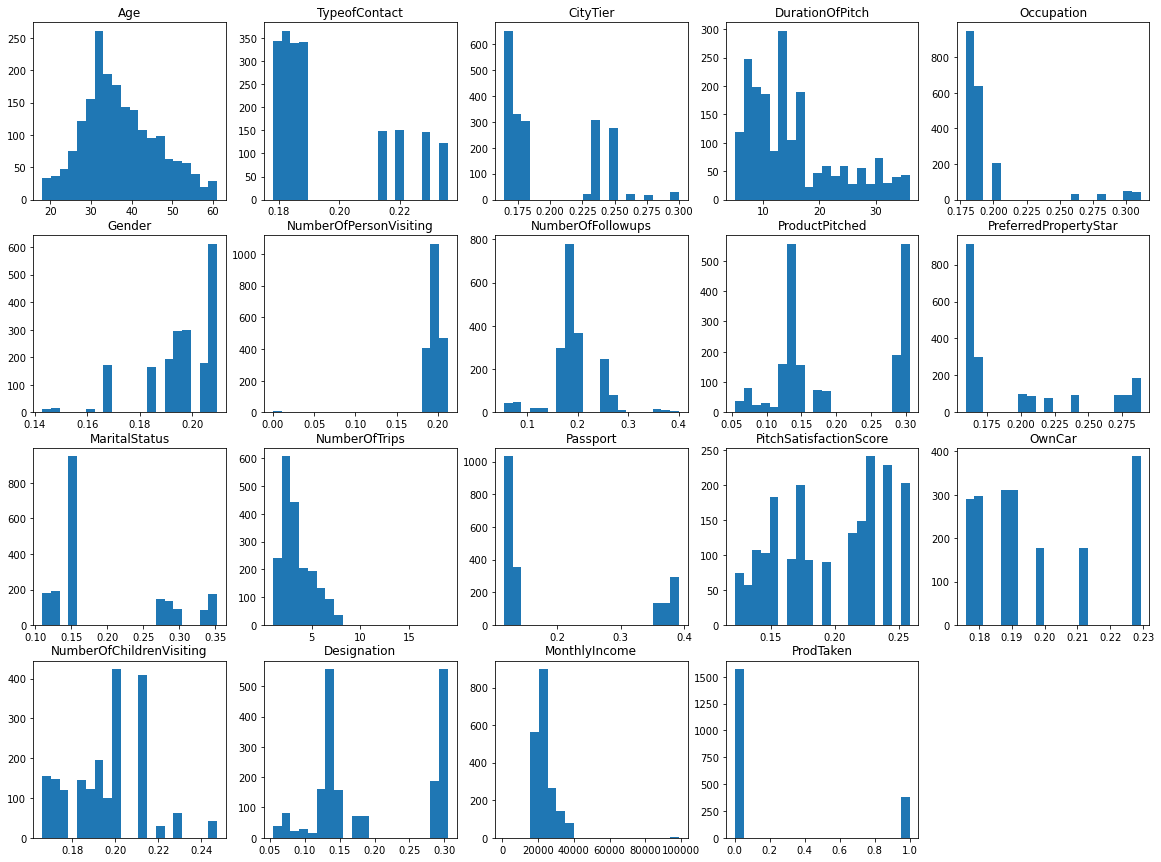

In [390]:
plt.figure(figsize=(20,15))
train_col = train_df.columns
for i, col in enumerate(train_col, 1):
    row = int(np.sqrt(len(train_col)))
    plt.subplot(row, int(len(train_col)/row)+1, i)
    plt.hist(train_df[col], bins=20)
    plt.title(col)
plt.show

num_cols = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
1. Age는 rankgauss 방법을 이용함

In [407]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(pd.concat([train_df[['Age']], test_df[['Age']]]))

train_df[['Age']] = transformer.transform(train_df[['Age']])
test_df[['Age']] = transformer.transform(test_df[['Age']])

2. DurationOfPitch는 박스-칵스 변환

In [408]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
pt.fit(pd.concat([train_df[['DurationOfPitch']], test_df[['DurationOfPitch']]]))

train_df[['DurationOfPitch']] = pt.transform(train_df[['DurationOfPitch']])
test_df[['DurationOfPitch']] = pt.transform(test_df[['DurationOfPitch']])

3. NumberOfTrips, MonthlyIncome는 클리핑

In [413]:
p01 = pd.concat([train_df[['NumberOfTrips', 'MonthlyIncome']], test_df[['NumberOfTrips', 'MonthlyIncome']]]).quantile(0.01)
p99 = pd.concat([train_df[['NumberOfTrips', 'MonthlyIncome']], test_df[['NumberOfTrips', 'MonthlyIncome']]]).quantile(0.90)

train_df[['NumberOfTrips', 'MonthlyIncome']] = train_df[['NumberOfTrips', 'MonthlyIncome']].clip(p01, p99, axis=1)
test_df[['NumberOfTrips', 'MonthlyIncome']] = test_df[['NumberOfTrips', 'MonthlyIncome']].clip(p01, p99, axis=1)

4. NumberOfTrips, MonthlyIncome는 rankgauss

In [415]:
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(pd.concat([train_df[['NumberOfTrips', 'MonthlyIncome']], test_df[['NumberOfTrips', 'MonthlyIncome']]]))

train_df[['NumberOfTrips', 'MonthlyIncome']] = transformer.transform(train_df[['NumberOfTrips', 'MonthlyIncome']])
test_df[['NumberOfTrips', 'MonthlyIncome']] = transformer.transform(test_df[['NumberOfTrips', 'MonthlyIncome']])

<function matplotlib.pyplot.show(close=None, block=None)>

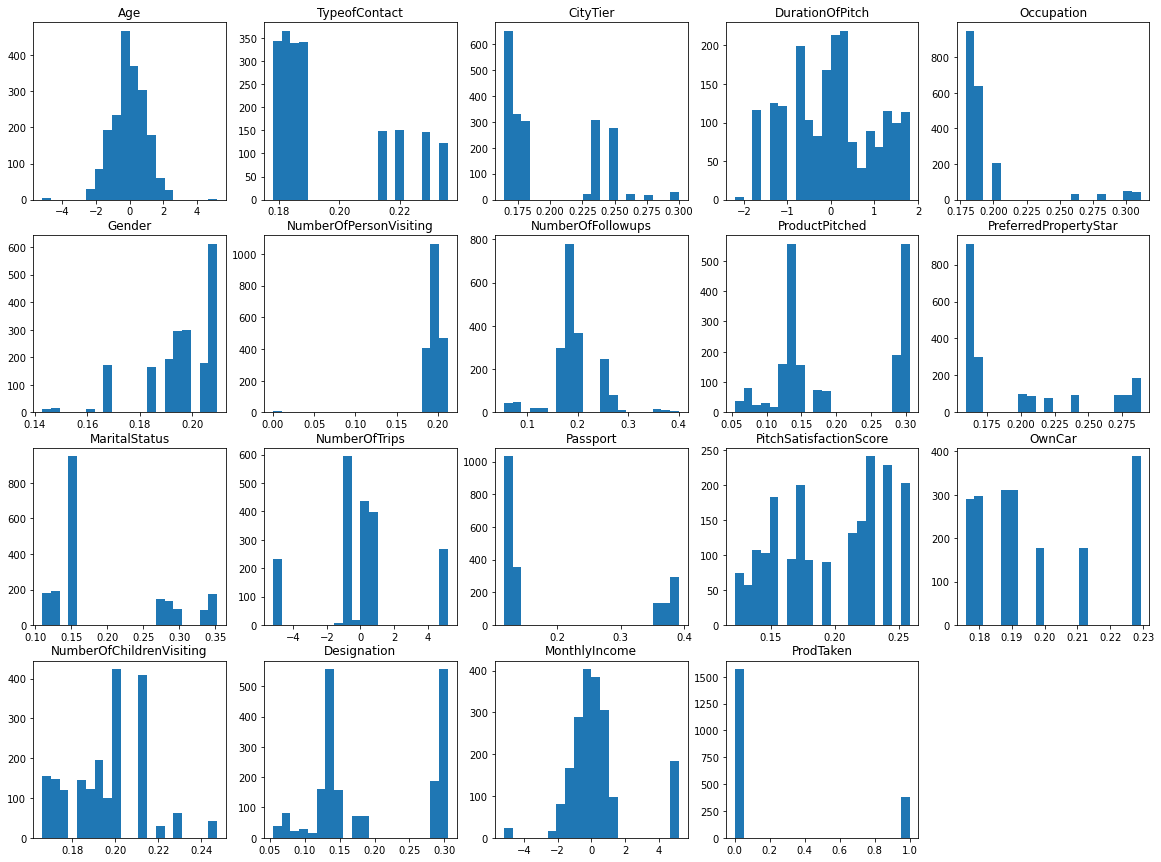

In [416]:
plt.figure(figsize=(20,15))
train_col = train_df.columns
for i, col in enumerate(train_col, 1):
    row = int(np.sqrt(len(train_col)))
    plt.subplot(row, int(len(train_col)/row)+1, i)
    plt.hist(train_df[col], bins=20)
    plt.title(col)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

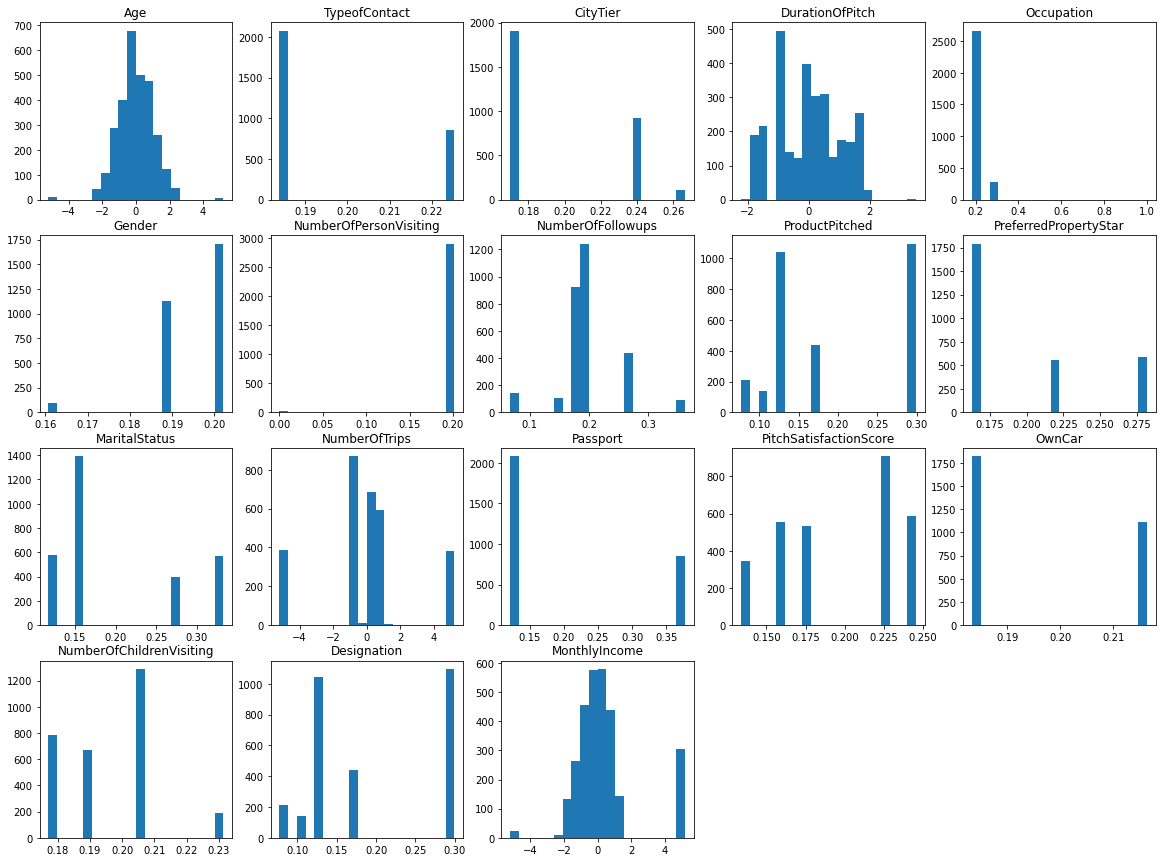

In [417]:
plt.figure(figsize=(20,15))
test_col = test_df.columns
for i, col in enumerate(test_col, 1):
    row = int(np.sqrt(len(test_col)))
    plt.subplot(row, int(len(test_col)/row)+1, i)
    plt.hist(test_df[col], bins=20)
    plt.title(col)
plt.show

5. 신경망 생성

In [629]:
train_df.isnull().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  1
Gender                      0
NumberOfPersonVisiting      1
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [636]:
train_df = train_df[-train_df['Occupation'].isna()]

In [637]:
train_df = train_df[-train_df['NumberOfPersonVisiting'].isna()]

In [638]:
train_df.isnull().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

### pytorch 사용

In [639]:
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F                       
from sklearn.metrics import mean_squared_error   
from torch.utils.data import TensorDataset, DataLoader, Dataset


x = train_df.drop('ProdTaken', axis=1).to_numpy()
y = train_df[['ProdTaken']].astype('float64').to_numpy().reshape((-1,1))

In [640]:
class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):

        return self.x_data[index], self.y_data[index] 

    def __len__(self):
        return self.len

In [641]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.1)

In [642]:
train_x.shape

(1757, 18)

In [721]:
train_dataset = TensorData(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=30, shuffle=False)

In [783]:
class travelNet(nn.Module):
    
    def __init__(self):
        super(travelNet, self).__init__()
        self.l1 = nn.Linear(18, 192, bias=True)
        self.l2 = nn.Linear(192, 150, bias=True)
        self.l3 = nn.Linear(150, 100, bias=True)
        self.l4 = nn.Linear(100, 50, bias=True)
        self.l5 = nn.Linear(50, 2, bias=True)
        self.batchnorm = nn.BatchNorm1d
        self.dropout = nn.Dropout(0.05)
        self.classifier = torch.softmax
        
    def forward(self, x):
        x = self.dropout(x)
        x = self.l1(x)
        x = self.batchnorm(x.size(dim=1))(x)
        x = nn.LeakyReLU(0.2)(x)
        x = self.l2(x)
        x = self.batchnorm(x.size(dim=1))(x)
        x = nn.LeakyReLU(0.2)(x)
        x = self.l3(x)
        x = self.batchnorm(x.size(dim=1))(x)
        x = nn.LeakyReLU(0.2)(x)
        x = self.l4(x)
        x = self.batchnorm(x.size(dim=1))(x)
        x = nn.LeakyReLU(0.2)(x)
        x = self.l5(x)
        x = self.batchnorm(x.size(dim=1))(x)
        x = nn.LeakyReLU(0.2)(x)
        x = self.classifier(x, dim=1)
        return x

In [723]:
mlp_model = travelNet()
criterion = nn.CrossEntropyLoss()

lr1 = 0.01
lr2 = 0.001
lr3 = 0.0001

params_ft = []
params_ft.append({'params': mlp_model.l1.parameters(), 'lr': lr3})
params_ft.append({'params': mlp_model.l2.parameters(), 'lr': lr2})
params_ft.append({'params': mlp_model.l3.parameters(), 'lr': lr2})
params_ft.append({'params': mlp_model.l4.parameters(), 'lr': lr1})

optimizer = optim.Adam(params_ft)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.1)
epoch_num = 600

In [724]:
len(train_dataloader)

59

In [725]:
mlp_model.train(True)

for epoch in range(epoch_num):
    print(f'Epoch {epoch+1}/{epoch_num} is running ---------------')
    
    running_loss = 0.0
    running_corrects = 0
    
    for i, (data, label) in enumerate(train_dataloader):
        
        optimizer.zero_grad()
        output = mlp_model.forward(data)
        
        # view([r, c])는 크기 -1이 아닌 [r, c]만큼의 행렬로 만들어준다.
        label = label.view([1,-1]).squeeze()
        label = label.long()
        
        _, preds = torch.max(output.data, 1)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data.item()
        running_corrects += torch.sum(preds == label)
    
    # print(running_loss)
    epoch_loss = running_loss / i
    epoch_corrects = running_corrects / train_x.shape[0]
    
    scheduler.step()
    
    print(f'loss:{epoch_loss}, accuracy:{epoch_corrects}')



Epoch 1/600 is running ---------------
loss:0.5802522368472198, accuracy:0.8081957697868347
Epoch 2/600 is running ---------------
loss:0.519085690892976, accuracy:0.8081957697868347
Epoch 3/600 is running ---------------
loss:0.5151657775558275, accuracy:0.8081957697868347
Epoch 4/600 is running ---------------
loss:0.514551739754348, accuracy:0.8081957697868347
Epoch 5/600 is running ---------------
loss:0.5142690333826788, accuracy:0.8081957697868347
Epoch 6/600 is running ---------------
loss:0.5141820655814533, accuracy:0.8081957697868347
Epoch 7/600 is running ---------------
loss:0.5138716867257809, accuracy:0.8076266646385193
Epoch 8/600 is running ---------------
loss:0.5132855562300518, accuracy:0.8087649345397949
Epoch 9/600 is running ---------------
loss:0.5130260062628779, accuracy:0.8081957697868347
Epoch 10/600 is running ---------------
loss:0.5131160323989803, accuracy:0.8076266646385193
Epoch 11/600 is running ---------------
loss:0.5123766861085234, accuracy:0.80819

loss:0.4867829197439654, accuracy:0.8298235535621643
Epoch 92/600 is running ---------------
loss:0.48411732500997084, accuracy:0.836084246635437
Epoch 93/600 is running ---------------
loss:0.48803047116460474, accuracy:0.8292543888092041
Epoch 94/600 is running ---------------
loss:0.48256920123922414, accuracy:0.8394991755485535
Epoch 95/600 is running ---------------
loss:0.4852413324446514, accuracy:0.8355150818824768
Epoch 96/600 is running ---------------
loss:0.48178608150317753, accuracy:0.8389300107955933
Epoch 97/600 is running ---------------
loss:0.4863604898082799, accuracy:0.836084246635437
Epoch 98/600 is running ---------------
loss:0.4851918050955082, accuracy:0.8315310478210449
Epoch 99/600 is running ---------------
loss:0.49013446374186154, accuracy:0.8258395195007324
Epoch 100/600 is running ---------------
loss:0.48023859694086274, accuracy:0.8389300107955933
Epoch 101/600 is running ---------------
loss:0.4831826301484272, accuracy:0.8343767523765564
Epoch 102/6

loss:0.4719471453592695, accuracy:0.847467303276062
Epoch 180/600 is running ---------------
loss:0.47287996729900095, accuracy:0.8468981385231018
Epoch 181/600 is running ---------------
loss:0.4763575412076095, accuracy:0.8434832096099854
Epoch 182/600 is running ---------------
loss:0.4706680019353998, accuracy:0.847467303276062
Epoch 183/600 is running ---------------
loss:0.4732658899035947, accuracy:0.8497439026832581
Epoch 184/600 is running ---------------
loss:0.4711189305987851, accuracy:0.8457598090171814
Epoch 185/600 is running ---------------
loss:0.468126157234455, accuracy:0.8537279367446899
Epoch 186/600 is running ---------------
loss:0.4761507434063944, accuracy:0.8400682806968689
Epoch 187/600 is running ---------------
loss:0.4712994196291628, accuracy:0.847467303276062
Epoch 188/600 is running ---------------
loss:0.4721853085632982, accuracy:0.847467303276062
Epoch 189/600 is running ---------------
loss:0.47131114427385656, accuracy:0.8486055731773376
Epoch 190/

loss:0.4622325182988726, accuracy:0.858281135559082
Epoch 267/600 is running ---------------
loss:0.46281746851986855, accuracy:0.8571428656578064
Epoch 268/600 is running ---------------
loss:0.4641553399891689, accuracy:0.8565737009048462
Epoch 269/600 is running ---------------
loss:0.467639052148523, accuracy:0.8525896668434143
Epoch 270/600 is running ---------------
loss:0.46575794651590546, accuracy:0.8542971014976501
Epoch 271/600 is running ---------------
loss:0.4652497634805482, accuracy:0.8542971014976501
Epoch 272/600 is running ---------------
loss:0.4646656888312307, accuracy:0.856004536151886
Epoch 273/600 is running ---------------
loss:0.4653011889293276, accuracy:0.8542971014976501
Epoch 274/600 is running ---------------
loss:0.4662158915708805, accuracy:0.8537279367446899
Epoch 275/600 is running ---------------
loss:0.46629223844100687, accuracy:0.8548662662506104
Epoch 276/600 is running ---------------
loss:0.4670234317409581, accuracy:0.8514513373374939
Epoch 2

loss:0.4580982676867781, accuracy:0.8634034991264343
Epoch 354/600 is running ---------------
loss:0.4573621117863162, accuracy:0.8634034991264343
Epoch 355/600 is running ---------------
loss:0.4547818955676309, accuracy:0.8656801581382751
Epoch 356/600 is running ---------------
loss:0.45625265148179284, accuracy:0.8656801581382751
Epoch 357/600 is running ---------------
loss:0.459258457710003, accuracy:0.8588503003120422
Epoch 358/600 is running ---------------
loss:0.4584758595145982, accuracy:0.8616960644721985
Epoch 359/600 is running ---------------
loss:0.45878404789957505, accuracy:0.8611268997192383
Epoch 360/600 is running ---------------
loss:0.4563963685570092, accuracy:0.8656801581382751
Epoch 361/600 is running ---------------
loss:0.459600614062671, accuracy:0.8611268997192383
Epoch 362/600 is running ---------------
loss:0.4553799880989667, accuracy:0.8639726638793945
Epoch 363/600 is running ---------------
loss:0.45816376599772224, accuracy:0.8622652292251587
Epoch 

loss:0.4597528951949087, accuracy:0.8616960644721985
Epoch 441/600 is running ---------------
loss:0.4591089281542548, accuracy:0.8599886298179626
Epoch 442/600 is running ---------------
loss:0.457993194974702, accuracy:0.8616960644721985
Epoch 443/600 is running ---------------
loss:0.4557757084739619, accuracy:0.8639726638793945
Epoch 444/600 is running ---------------
loss:0.45986312473642416, accuracy:0.8611268997192383
Epoch 445/600 is running ---------------
loss:0.46196034036833666, accuracy:0.8577120304107666
Epoch 446/600 is running ---------------
loss:0.4593752807584302, accuracy:0.8611268997192383
Epoch 447/600 is running ---------------
loss:0.4515954004279498, accuracy:0.8713716268539429
Epoch 448/600 is running ---------------
loss:0.45744538975173027, accuracy:0.8634034991264343
Epoch 449/600 is running ---------------
loss:0.45460588818994063, accuracy:0.867387592792511
Epoch 450/600 is running ---------------
loss:0.458476310146266, accuracy:0.8599886298179626
Epoch 

loss:0.45813177680147105, accuracy:0.8622652292251587
Epoch 529/600 is running ---------------
loss:0.45480807331101647, accuracy:0.8662492632865906
Epoch 530/600 is running ---------------
loss:0.4565629244878374, accuracy:0.8622652292251587
Epoch 531/600 is running ---------------
loss:0.4534185955236698, accuracy:0.8656801581382751
Epoch 532/600 is running ---------------
loss:0.45235647672209245, accuracy:0.8685259222984314
Epoch 533/600 is running ---------------
loss:0.45572393978464193, accuracy:0.8651109933853149
Epoch 534/600 is running ---------------
loss:0.45351787117020836, accuracy:0.8679567575454712
Epoch 535/600 is running ---------------
loss:0.4599294277100727, accuracy:0.8622652292251587
Epoch 536/600 is running ---------------
loss:0.4533102178368075, accuracy:0.8685259222984314
Epoch 537/600 is running ---------------
loss:0.46027926586825274, accuracy:0.8605577945709229
Epoch 538/600 is running ---------------
loss:0.46035153804154233, accuracy:0.8605577945709229


In [788]:
valid_dataset = TensorData(valid_x, valid_y)
valid_dataloader = DataLoader(valid_dataset, batch_size=len(valid_dataset), shuffle=False)

In [789]:
mlp_model.train(False)
#mlp_model.dropout = nn.Sequential()

for i, (data, label) in enumerate(valid_dataloader):
    
    output = mlp_model.forward(data)
    label = label.view([1,-1]).squeeze()
    label = label.long()
    _, preds = torch.max(output.data, 1)
    
accuracy = torch.sum(preds == label) / len(valid_dataset)
print(f'accuracy:{accuracy}')    

accuracy:0.7602040767669678


In [774]:
total_train_dataset = TensorData(x, y)
total_train_dataloader = DataLoader(total_train_dataset, batch_size=64, shuffle=False)

In [786]:
mlp_model = travelNet()
criterion = nn.CrossEntropyLoss()

lr1 = 0.01
lr2 = 0.001
lr3 = 0.0001
best_lr = 7.9094022518724e-05

params_ft = []
params_ft.append({'params': mlp_model.l1.parameters(), 'lr': best_lr})
params_ft.append({'params': mlp_model.l2.parameters(), 'lr': best_lr})
params_ft.append({'params': mlp_model.l3.parameters(), 'lr': best_lr})
params_ft.append({'params': mlp_model.l4.parameters(), 'lr': best_lr})

optimizer = optim.Adam(params_ft)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.1)
epoch_num = 600

'batch_norm': 'before_act', 'batch_size': 64.0, 'hidden_activation': 'relu', 'hidden_dropout': 0.0, 'hidden_layers': 4.0, 'hidden_units': 192.0, 'input_dropout': 0.05, 'optimizer': {'lr': 7.9094022518724e-05, 'type': 'adam'}

In [787]:
mlp_model.train(True)

for epoch in range(epoch_num):
    print(f'Epoch {epoch+1}/{epoch_num} is running ---------------')
    
    running_loss = 0.0
    running_corrects = 0
    
    for i, (data, label) in enumerate(total_train_dataloader):
        
        optimizer.zero_grad()
        output = mlp_model.forward(data)
        
        # view([r, c])는 크기 -1이 아닌 [r, c]만큼의 행렬로 만들어준다.
        label = label.view([1,-1]).squeeze()
        label = label.long()
        
        _, preds = torch.max(output.data, 1)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data.item()
        running_corrects += torch.sum(preds == label)
    
    # print(running_loss)
    epoch_loss = running_loss / train_x.shape[0]
    epoch_corrects = running_corrects / train_x.shape[0]
    
    scheduler.step()
    
    print(f'loss:{epoch_loss}, accuracy:{epoch_corrects}')


Epoch 1/600 is running ---------------
loss:0.012158763971800959, accuracy:0.5788275599479675
Epoch 2/600 is running ---------------
loss:0.011748273771597569, accuracy:0.6528173089027405
Epoch 3/600 is running ---------------
loss:0.011505400347451832, accuracy:0.689812183380127
Epoch 4/600 is running ---------------
loss:0.011372335267867564, accuracy:0.7199772596359253
Epoch 5/600 is running ---------------
loss:0.011257108430259935, accuracy:0.7478656768798828
Epoch 6/600 is running ---------------
loss:0.01118114907835177, accuracy:0.7507114410400391
Epoch 7/600 is running ---------------
loss:0.011063705979251156, accuracy:0.7689242959022522
Epoch 8/600 is running ---------------
loss:0.011088790205573927, accuracy:0.7666476964950562
Epoch 9/600 is running ---------------
loss:0.011055985634206166, accuracy:0.7689242959022522
Epoch 10/600 is running ---------------
loss:0.010953250023609003, accuracy:0.7848605513572693
Epoch 11/600 is running ---------------
loss:0.01090443110560

loss:0.010211239739039708, accuracy:0.8776323199272156
Epoch 89/600 is running ---------------
loss:0.010214476539251408, accuracy:0.8793397545814514
Epoch 90/600 is running ---------------
loss:0.010142416321695292, accuracy:0.8759248852729797
Epoch 91/600 is running ---------------
loss:0.010291878852779103, accuracy:0.8491747379302979
Epoch 92/600 is running ---------------
loss:0.0102046657232785, accuracy:0.867387592792511
Epoch 93/600 is running ---------------
loss:0.010171341332917059, accuracy:0.878770649433136
Epoch 94/600 is running ---------------
loss:0.010234895998195416, accuracy:0.8679567575454712
Epoch 95/600 is running ---------------
loss:0.01014027238638481, accuracy:0.8764940500259399
Epoch 96/600 is running ---------------
loss:0.010166308319426153, accuracy:0.8759248852729797
Epoch 97/600 is running ---------------
loss:0.010171695161286442, accuracy:0.8713716268539429
Epoch 98/600 is running ---------------
loss:0.010188412008193249, accuracy:0.8719407916069031


loss:0.010053651910921899, accuracy:0.8850312829017639
Epoch 176/600 is running ---------------
loss:0.010043571059108119, accuracy:0.8952760100364685
Epoch 177/600 is running ---------------
loss:0.009997281657747064, accuracy:0.8890153765678406
Epoch 178/600 is running ---------------
loss:0.009986704123176223, accuracy:0.88730788230896
Epoch 179/600 is running ---------------
loss:0.0099986914415962, accuracy:0.8856004476547241
Epoch 180/600 is running ---------------
loss:0.00999132869049576, accuracy:0.8901536464691162
Epoch 181/600 is running ---------------
loss:0.009962365616433107, accuracy:0.9003984332084656
Epoch 182/600 is running ---------------
loss:0.01005454092590254, accuracy:0.8850312829017639
Epoch 183/600 is running ---------------
loss:0.010029633376295755, accuracy:0.8844621777534485
Epoch 184/600 is running ---------------
loss:0.009976862402347658, accuracy:0.900967538356781
Epoch 185/600 is running ---------------
loss:0.010017899097742245, accuracy:0.891861140

loss:0.009885261360053386, accuracy:0.8992601037025452
Epoch 263/600 is running ---------------
loss:0.009859392978144968, accuracy:0.9072282314300537
Epoch 264/600 is running ---------------
loss:0.00988685555531345, accuracy:0.9083665609359741
Epoch 265/600 is running ---------------
loss:0.009819375362732767, accuracy:0.9191803932189941
Epoch 266/600 is running ---------------
loss:0.009787262062763178, accuracy:0.923733651638031
Epoch 267/600 is running ---------------
loss:0.009858198476638316, accuracy:0.9077973961830139
Epoch 268/600 is running ---------------
loss:0.009805291467046765, accuracy:0.9077973961830139
Epoch 269/600 is running ---------------
loss:0.009872036727911787, accuracy:0.9060899019241333
Epoch 270/600 is running ---------------
loss:0.009888508235722966, accuracy:0.8981217741966248
Epoch 271/600 is running ---------------
loss:0.009825462872967098, accuracy:0.9140580296516418
Epoch 272/600 is running ---------------
loss:0.009814820238047183, accuracy:0.9100

loss:0.009720678552009874, accuracy:0.9174729585647583
Epoch 350/600 is running ---------------
loss:0.009730391327332012, accuracy:0.9243028163909912
Epoch 351/600 is running ---------------
loss:0.009693941170340175, accuracy:0.9345475435256958
Epoch 352/600 is running ---------------
loss:0.009720683403156261, accuracy:0.9174729585647583
Epoch 353/600 is running ---------------
loss:0.009779142329281681, accuracy:0.9191803932189941
Epoch 354/600 is running ---------------
loss:0.009698558104737074, accuracy:0.9271485209465027
Epoch 355/600 is running ---------------
loss:0.00975186718276908, accuracy:0.9288560152053833
Epoch 356/600 is running ---------------
loss:0.009786617878016655, accuracy:0.9191803932189941
Epoch 357/600 is running ---------------
loss:0.009710723728229868, accuracy:0.9186112880706787
Epoch 358/600 is running ---------------
loss:0.00972843078570944, accuracy:0.9089356660842896
Epoch 359/600 is running ---------------
loss:0.009755667394443744, accuracy:0.9169

loss:0.009642142562887923, accuracy:0.9385315775871277
Epoch 438/600 is running ---------------
loss:0.00976131677491867, accuracy:0.9225953221321106
Epoch 439/600 is running ---------------
loss:0.009715303210419692, accuracy:0.9208878874778748
Epoch 440/600 is running ---------------
loss:0.009735114240619224, accuracy:0.9254410862922668
Epoch 441/600 is running ---------------
loss:0.009727844645099064, accuracy:0.923733651638031
Epoch 442/600 is running ---------------
loss:0.009756819049811323, accuracy:0.9095048308372498
Epoch 443/600 is running ---------------
loss:0.009716537945909669, accuracy:0.9203187227249146
Epoch 444/600 is running ---------------
loss:0.009664232003532761, accuracy:0.926010251045227
Epoch 445/600 is running ---------------
loss:0.009727522671460155, accuracy:0.9220261573791504
Epoch 446/600 is running ---------------
loss:0.009703686241406098, accuracy:0.923733651638031
Epoch 447/600 is running ---------------
loss:0.009719714734387385, accuracy:0.922595

loss:0.009687361964191574, accuracy:0.9248719215393066
Epoch 525/600 is running ---------------
loss:0.0096958824430736, accuracy:0.926010251045227
Epoch 526/600 is running ---------------
loss:0.009707126891538374, accuracy:0.9191803932189941
Epoch 527/600 is running ---------------
loss:0.009682958276691122, accuracy:0.9197495579719543
Epoch 528/600 is running ---------------
loss:0.009669370656672973, accuracy:0.9265794157981873
Epoch 529/600 is running ---------------
loss:0.00974907254928476, accuracy:0.9220261573791504
Epoch 530/600 is running ---------------
loss:0.009755800342994043, accuracy:0.914627194404602
Epoch 531/600 is running ---------------
loss:0.009647358902218536, accuracy:0.9277176856994629
Epoch 532/600 is running ---------------
loss:0.009693779114911552, accuracy:0.9271485209465027
Epoch 533/600 is running ---------------
loss:0.009707744344093614, accuracy:0.9134889245033264
Epoch 534/600 is running ---------------
loss:0.009714865148508488, accuracy:0.9140580

In [750]:
empty_torch = np.zeros(test_df.shape[0], dtype=float)
test_dataset = TensorData(test_df.to_numpy(), empty_torch)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [761]:
mlp_model.train(False)

for i, (data,label) in enumerate(test_dataloader):
    
    output = mlp_model.forward(data)
    _, preds = torch.max(output.data, 1)
    
sub_file['ProdTaken'] = preds.detach().numpy()
file_name = 'mlp_result.csv'
sub_file.to_csv(os.path.join(file_path, file_name))

In [753]:
len(test_df)

2933

### keras 사용

In [770]:
import tensorflow as tf
from hyperopt import hp
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import ReLU, PReLU
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler

# 기본이 되는 매개변수
base_param = {
    'input_dropout': 0.0,
    'hidden_layers': 3,
    'hidden_units': 96,
    'hidden_activation': 'relu',
    'hidden_dropout': 0.2,
    'batch_norm': 'before_act',
    'optimizer': {'type': 'adam', 'lr': 0.001},
    'batch_size': 64,
}

# 탐색할 매개변수 공간을 지정
param_space = {
    'input_dropout': hp.quniform('input_dropout', 0, 0.2, 0.05),
    'hidden_layers': hp.quniform('hidden_layers', 2, 4, 1),
    'hidden_units': hp.quniform('hidden_units', 32, 256, 32),
    'hidden_activation': hp.choice('hidden_activation', ['prelu', 'relu']),
    'hidden_dropout': hp.quniform('hidden_dropout', 0, 0.3, 0.05),
    'batch_norm': hp.choice('batch_norm', ['before_act', 'no']),
    'optimizer': hp.choice('optimizer',
                           [{'type': 'adam',
                             'lr': hp.loguniform('adam_lr', np.log(0.00001), np.log(0.01))},
                            {'type': 'sgd',
                             'lr': hp.loguniform('sgd_lr', np.log(0.00001), np.log(0.01))}]),
    'batch_size': hp.quniform('batch_size', 32, 128, 32),
}


class MLP:

    def __init__(self, params):
        self.params = params
        self.scaler = None
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):

        # 매개변수
        input_dropout = self.params['input_dropout']
        hidden_layers = int(self.params['hidden_layers'])
        hidden_units = int(self.params['hidden_units'])
        hidden_activation = self.params['hidden_activation']
        hidden_dropout = self.params['hidden_dropout']
        batch_norm = self.params['batch_norm']
        optimizer_type = self.params['optimizer']['type']
        optimizer_lr = self.params['optimizer']['lr']
        batch_size = int(self.params['batch_size'])

        # 표준화
#         self.scaler = StandardScaler()
#         tr_x = self.scaler.fit_transform(tr_x)
#         va_x = self.scaler.transform(va_x)

        self.model = Sequential()

        # 입력계층
        self.model.add(Dropout(input_dropout, input_shape=(tr_x.shape[1],)))

        # 은닉계층
        for i in range(hidden_layers):
            self.model.add(Dense(hidden_units))
            if batch_norm == 'before_act':
                self.model.add(BatchNormalization())
            if hidden_activation == 'prelu':
                self.model.add(PReLU())
            elif hidden_activation == 'relu':
                self.model.add(ReLU())
            else:
                raise NotImplementedError
            self.model.add(Dropout(hidden_dropout))

        # 출력 계층
        self.model.add(Dense(1, activation='sigmoid'))

        # 최적화(옵티마이저)
        if optimizer_type == 'sgd':
            optimizer = SGD(lr=optimizer_lr, decay=1e-6, momentum=0.9, nesterov=True)
        elif optimizer_type == 'adam':
            optimizer = Adam(lr=optimizer_lr, beta_1=0.9, beta_2=0.999, decay=0.)
        else:
            raise NotImplementedError

        # 목적함수, 평가지표 등의 설정
        self.model.compile(loss='binary_crossentropy',
                           optimizer=optimizer, metrics=['accuracy'])

        # 에폭 수, 조기 종료
        # 에폭을 너무 크게 하면 작은 학습률일 때 끝나지 않을 수 있으므로 주의
        nb_epoch = 200
        patience = 20
        early_stopping = EarlyStopping(patience=patience, restore_best_weights=True)

        # 학습의 실행
        history = self.model.fit(tr_x, tr_y,
                                 epochs=nb_epoch,
                                 batch_size=batch_size, verbose=1,
                                 validation_data=(va_x, va_y),
                                 callbacks=[early_stopping])

    def predict(self, x):
        # 예측
        # x = self.scaler.transform(x)
        y_pred = self.model.predict(x)
        y_pred = y_pred.flatten()
        return y_pred


# -----------------------------------
# 매개변수 튜닝의 실행
# -----------------------------------
from hyperopt import fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import log_loss


def score(params):
    # 매개변수 셋을 지정했을 때, 최소화해야 할 함수를 지정
    # 모델의 매개변수 탐색에서는 모델에 매개변수를 지정하여 학습예측한 경우의 점수로 함
    model = MLP(params)
    model.fit(train_x, train_y, valid_x, valid_y)
    valid_pred = model.predict(valid_x)
    score = log_loss(valid_y, valid_pred)
    print(f'params: {params}, logloss: {score:.4f}')

    # 정보를 기록
    history.append((params, score))

    return {'loss': score, 'status': STATUS_OK}


# hyperopt에 의한 매개변수 탐색의 실행
max_evals = 10
trials = Trials()
history = []
fmin(score, param_space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

# 기록한 정보에서 매개변수와 점수를 출력
# trials에서도 정보를 취득할 수 있지만 매개변수를 취득하기 어려움
history = sorted(history, key=lambda tpl: tpl[1])
best = history[0]
print(f'best params:{best[0]}, score:{best[1]:.4f}')

Epoch 1/200                                                                     

  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



14/14 [==============================] - 1s 12ms/step - loss: 0.7511 - accuracy: 0.3375 - val_loss: 0.7231 - val_accuracy: 0.3929

Epoch 2/200                                                                     

14/14 [==============================] - 0s 3ms/step - loss: 0.7279 - accuracy: 0.4007 - val_loss: 0.7029 - val_accuracy: 0.4949

Epoch 3/200                                                                     

14/14 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.4713 - val_loss: 0.6843 - val_accuracy: 0.5408

Epoch 4/200                                                                     

14/14 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5487 - val_loss: 0.6676 - val_accuracy: 0.6122

Epoch 5/200                                                                     

14/14 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.6153 - val_loss: 0.6526 - val_accuracy: 0.6888

Epoch 6/200          

14/14 [==============================] - 0s 4ms/step - loss: 0.4390 - accuracy: 0.8093 - val_loss: 0.4842 - val_accuracy: 0.7704

Epoch 57/200                                                                    

14/14 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.8105 - val_loss: 0.4828 - val_accuracy: 0.7704

Epoch 58/200                                                                    

14/14 [==============================] - 0s 4ms/step - loss: 0.4399 - accuracy: 0.8116 - val_loss: 0.4815 - val_accuracy: 0.7755

Epoch 59/200                                                                    

14/14 [==============================] - 0s 4ms/step - loss: 0.4346 - accuracy: 0.8116 - val_loss: 0.4802 - val_accuracy: 0.7755

Epoch 60/200                                                                    

14/14 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8145 - val_loss: 0.4790 - val_accuracy: 0.7755

Epoch 61/200          

Epoch 112/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8384 - val_loss: 0.4395 - val_accuracy: 0.8061

Epoch 113/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.8423 - val_loss: 0.4391 - val_accuracy: 0.8112

Epoch 114/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8406 - val_loss: 0.4387 - val_accuracy: 0.8112

Epoch 115/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8372 - val_loss: 0.4384 - val_accuracy: 0.8112

Epoch 116/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3934 - 

14/14 [==============================] - 0s 3ms/step - loss: 0.3782 - accuracy: 0.8560 - val_loss: 0.4284 - val_accuracy: 0.8112

Epoch 168/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8520 - val_loss: 0.4285 - val_accuracy: 0.8112

Epoch 169/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8435 - val_loss: 0.4284 - val_accuracy: 0.8112

Epoch 170/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8543 - val_loss: 0.4283 - val_accuracy: 0.8112

Epoch 171/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8480 - val_loss: 0.4282 - val_accuracy: 0.8112

Epoch 172/200         

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



14/14 [==============================] - 1s 11ms/step - loss: 0.6661 - accuracy: 0.6249 - val_loss: 0.6534 - val_accuracy: 0.7041

Epoch 2/200                                                                     

14/14 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.7445 - val_loss: 0.6240 - val_accuracy: 0.7755

Epoch 3/200                                                                     

14/14 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7940 - val_loss: 0.6005 - val_accuracy: 0.7704

Epoch 4/200                                                                     

14/14 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.8105 - val_loss: 0.5829 - val_accuracy: 0.7704

Epoch 5/200                                                                     

14/14 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.8082 - val_loss: 0.5698 - val_accuracy: 0.7704

Epoch 6/200          

14/14 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8162 - val_loss: 0.4701 - val_accuracy: 0.7806

Epoch 57/200                                                                    

14/14 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8162 - val_loss: 0.4693 - val_accuracy: 0.7806

Epoch 58/200                                                                    

14/14 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8184 - val_loss: 0.4684 - val_accuracy: 0.7806

Epoch 59/200                                                                    

14/14 [==============================] - 0s 4ms/step - loss: 0.4353 - accuracy: 0.8184 - val_loss: 0.4676 - val_accuracy: 0.7806

Epoch 60/200                                                                    

14/14 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8167 - val_loss: 0.4667 - val_accuracy: 0.7857

Epoch 61/200          

Epoch 112/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8361 - val_loss: 0.4377 - val_accuracy: 0.8112

Epoch 113/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8355 - val_loss: 0.4374 - val_accuracy: 0.8061

Epoch 114/200                                                                   

14/14 [==============================] - 0s 4ms/step - loss: 0.4142 - accuracy: 0.8298 - val_loss: 0.4371 - val_accuracy: 0.8061

Epoch 115/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8304 - val_loss: 0.4368 - val_accuracy: 0.8061

Epoch 116/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.4091 - 

14/14 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8321 - val_loss: 0.4263 - val_accuracy: 0.8214

Epoch 168/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.8332 - val_loss: 0.4262 - val_accuracy: 0.8214

Epoch 169/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8378 - val_loss: 0.4260 - val_accuracy: 0.8214

Epoch 170/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.4016 - accuracy: 0.8349 - val_loss: 0.4259 - val_accuracy: 0.8214

Epoch 171/200                                                                   

14/14 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8355 - val_loss: 0.4258 - val_accuracy: 0.8214

Epoch 172/200         

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



19/19 [==============================] - 1s 11ms/step - loss: 1.1542 - accuracy: 0.2891 - val_loss: 0.7290 - val_accuracy: 0.3520

Epoch 2/200                                                                     

19/19 [==============================] - 0s 4ms/step - loss: 1.1108 - accuracy: 0.2965 - val_loss: 0.7468 - val_accuracy: 0.2704

Epoch 3/200                                                                     

19/19 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.3182 - val_loss: 0.7566 - val_accuracy: 0.2857

Epoch 4/200                                                                     

19/19 [==============================] - 0s 3ms/step - loss: 1.0630 - accuracy: 0.3187 - val_loss: 0.7612 - val_accuracy: 0.2857

Epoch 5/200                                                                     

19/19 [==============================] - 0s 4ms/step - loss: 1.0506 - accuracy: 0.3210 - val_loss: 0.7634 - val_accuracy: 0.3010

Epoch 6/200          

19/19 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.7177 - val_loss: 0.5142 - val_accuracy: 0.8265

Epoch 54/200                                                                    

19/19 [==============================] - 0s 5ms/step - loss: 0.5580 - accuracy: 0.7285 - val_loss: 0.5094 - val_accuracy: 0.8214

Epoch 55/200                                                                    

19/19 [==============================] - 0s 4ms/step - loss: 0.5413 - accuracy: 0.7564 - val_loss: 0.5060 - val_accuracy: 0.8214

Epoch 56/200                                                                    

19/19 [==============================] - 0s 4ms/step - loss: 0.5532 - accuracy: 0.7416 - val_loss: 0.5032 - val_accuracy: 0.8214

Epoch 57/200                                                                    

19/19 [==============================] - 0s 4ms/step - loss: 0.5533 - accuracy: 0.7348 - val_loss: 0.5010 - val_accuracy: 0.8214

Epoch 58/200          

19/19 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8122 - val_loss: 0.4427 - val_accuracy: 0.8214

Epoch 99/200                                                                    

19/19 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.8127 - val_loss: 0.4421 - val_accuracy: 0.8214

Epoch 100/200                                                                   

19/19 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.7980 - val_loss: 0.4411 - val_accuracy: 0.8214

Epoch 101/200                                                                   

19/19 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.8065 - val_loss: 0.4404 - val_accuracy: 0.8214

Epoch 102/200                                                                   

19/19 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8145 - val_loss: 0.4397 - val_accuracy: 0.8214

Epoch 103/200         

19/19 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8184 - val_loss: 0.4230 - val_accuracy: 0.8265

Epoch 152/200                                                                   

19/19 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.8179 - val_loss: 0.4226 - val_accuracy: 0.8265

Epoch 153/200                                                                   

19/19 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.8133 - val_loss: 0.4228 - val_accuracy: 0.8265

Epoch 154/200                                                                   

19/19 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.8184 - val_loss: 0.4228 - val_accuracy: 0.8265

Epoch 155/200                                                                   

19/19 [==============================] - 0s 4ms/step - loss: 0.4358 - accuracy: 0.8253 - val_loss: 0.4226 - val_accuracy: 0.8265

Epoch 156/200         

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



28/28 [==============================] - 1s 8ms/step - loss: 0.6996 - accuracy: 0.4991 - val_loss: 0.6986 - val_accuracy: 0.4745

Epoch 2/200                                                                     

28/28 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5447 - val_loss: 0.6907 - val_accuracy: 0.5408

Epoch 3/200                                                                     

28/28 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5458 - val_loss: 0.6830 - val_accuracy: 0.6122

Epoch 4/200                                                                     

28/28 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6135 - val_loss: 0.6758 - val_accuracy: 0.6582

Epoch 5/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6352 - val_loss: 0.6689 - val_accuracy: 0.7296

Epoch 6/200           

28/28 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.8082 - val_loss: 0.5547 - val_accuracy: 0.7704

Epoch 49/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.8082 - val_loss: 0.5540 - val_accuracy: 0.7704

Epoch 50/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.8082 - val_loss: 0.5533 - val_accuracy: 0.7704

Epoch 51/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.8082 - val_loss: 0.5527 - val_accuracy: 0.7704

Epoch 52/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.8082 - val_loss: 0.5520 - val_accuracy: 0.7704

Epoch 53/200          

Epoch 92/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.8082 - val_loss: 0.5384 - val_accuracy: 0.7704

Epoch 93/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.8082 - val_loss: 0.5382 - val_accuracy: 0.7704

Epoch 94/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.8082 - val_loss: 0.5380 - val_accuracy: 0.7704

Epoch 95/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.8082 - val_loss: 0.5377 - val_accuracy: 0.7704

Epoch 96/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5036 - 

Epoch 142/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.8082 - val_loss: 0.5289 - val_accuracy: 0.7704

Epoch 143/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.8082 - val_loss: 0.5287 - val_accuracy: 0.7704

Epoch 144/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8082 - val_loss: 0.5285 - val_accuracy: 0.7704

Epoch 145/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.8082 - val_loss: 0.5284 - val_accuracy: 0.7704

Epoch 146/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.4944 - 

28/28 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.8082 - val_loss: 0.5200 - val_accuracy: 0.7704

Epoch 195/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.8082 - val_loss: 0.5198 - val_accuracy: 0.7704

Epoch 196/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.8082 - val_loss: 0.5197 - val_accuracy: 0.7704

Epoch 197/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.8082 - val_loss: 0.5195 - val_accuracy: 0.7704

Epoch 198/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.8082 - val_loss: 0.5193 - val_accuracy: 0.7704

Epoch 199/200         

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



28/28 [==============================] - 1s 8ms/step - loss: 0.9114 - accuracy: 0.3961 - val_loss: 0.6851 - val_accuracy: 0.5918

Epoch 2/200                                                                     

28/28 [==============================] - 0s 4ms/step - loss: 0.7626 - accuracy: 0.5139 - val_loss: 0.6596 - val_accuracy: 0.6735

Epoch 3/200                                                                     

28/28 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.6192 - val_loss: 0.6348 - val_accuracy: 0.7551

Epoch 4/200                                                                     

28/28 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.7001 - val_loss: 0.6078 - val_accuracy: 0.7806

Epoch 5/200                                                                     

28/28 [==============================] - 0s 4ms/step - loss: 0.5404 - accuracy: 0.7553 - val_loss: 0.5808 - val_accuracy: 0.8061

Epoch 6/200           

Epoch 23/200                                                                    

28/28 [==============================] - 0s 4ms/step - loss: 0.2389 - accuracy: 0.9118 - val_loss: 0.4002 - val_accuracy: 0.8214

Epoch 24/200                                                                    

28/28 [==============================] - 0s 4ms/step - loss: 0.2350 - accuracy: 0.9124 - val_loss: 0.3992 - val_accuracy: 0.8316

Epoch 25/200                                                                    

28/28 [==============================] - 0s 4ms/step - loss: 0.2372 - accuracy: 0.9192 - val_loss: 0.4005 - val_accuracy: 0.8265

Epoch 26/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9186 - val_loss: 0.4006 - val_accuracy: 0.8265

Epoch 27/200                                                                    

28/28 [==============================] - 0s 4ms/step - loss: 0.2234 - 

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



19/19 [==============================] - 1s 9ms/step - loss: 0.6781 - accuracy: 0.5697 - val_loss: 0.6650 - val_accuracy: 0.7602

Epoch 2/200                                                                     

19/19 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.7240 - val_loss: 0.6418 - val_accuracy: 0.7704

Epoch 3/200                                                                     

19/19 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.7746 - val_loss: 0.6222 - val_accuracy: 0.7704

Epoch 4/200                                                                     

19/19 [==============================] - 0s 4ms/step - loss: 0.5947 - accuracy: 0.7951 - val_loss: 0.6062 - val_accuracy: 0.7704

Epoch 5/200                                                                     

19/19 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.8042 - val_loss: 0.5931 - val_accuracy: 0.7704

Epoch 6/200           

Epoch 55/200                                                                    

19/19 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8275 - val_loss: 0.4420 - val_accuracy: 0.8112

Epoch 56/200                                                                    

19/19 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8304 - val_loss: 0.4410 - val_accuracy: 0.8112

Epoch 57/200                                                                    

19/19 [==============================] - 0s 4ms/step - loss: 0.4074 - accuracy: 0.8275 - val_loss: 0.4400 - val_accuracy: 0.8163

Epoch 58/200                                                                    

19/19 [==============================] - 0s 4ms/step - loss: 0.4078 - accuracy: 0.8332 - val_loss: 0.4389 - val_accuracy: 0.8214

Epoch 59/200                                                                    

19/19 [==============================] - 0s 4ms/step - loss: 0.4081 - 

Epoch 108/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8503 - val_loss: 0.4220 - val_accuracy: 0.8367

Epoch 109/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8458 - val_loss: 0.4218 - val_accuracy: 0.8367

Epoch 110/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8566 - val_loss: 0.4217 - val_accuracy: 0.8367

Epoch 111/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8452 - val_loss: 0.4216 - val_accuracy: 0.8367

Epoch 112/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3756 - 

Epoch 162/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.8566 - val_loss: 0.4186 - val_accuracy: 0.8367

Epoch 163/200                                                                   

19/19 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.8589 - val_loss: 0.4183 - val_accuracy: 0.8367

Epoch 164/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8583 - val_loss: 0.4183 - val_accuracy: 0.8367

Epoch 165/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3779 - accuracy: 0.8458 - val_loss: 0.4181 - val_accuracy: 0.8469

Epoch 166/200                                                                   

19/19 [==============================] - 0s 3ms/step - loss: 0.3683 - 

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



28/28 [==============================] - 1s 6ms/step - loss: 0.7334 - accuracy: 0.4200 - val_loss: 0.7014 - val_accuracy: 0.5306

Epoch 2/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5999 - val_loss: 0.6636 - val_accuracy: 0.6327

Epoch 3/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7006 - val_loss: 0.6327 - val_accuracy: 0.7398

Epoch 4/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7752 - val_loss: 0.6078 - val_accuracy: 0.7653

Epoch 5/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7968 - val_loss: 0.5878 - val_accuracy: 0.7704

Epoch 6/200           

28/28 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8389 - val_loss: 0.4461 - val_accuracy: 0.8061

Epoch 57/200                                                                    

28/28 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8344 - val_loss: 0.4457 - val_accuracy: 0.8010

Epoch 58/200                                                                    

28/28 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8367 - val_loss: 0.4447 - val_accuracy: 0.8061

Epoch 59/200                                                                    

28/28 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8384 - val_loss: 0.4443 - val_accuracy: 0.8061

Epoch 60/200                                                                    

28/28 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8418 - val_loss: 0.4437 - val_accuracy: 0.8112

Epoch 61/200          

28/28 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8486 - val_loss: 0.4312 - val_accuracy: 0.8214

Epoch 112/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8543 - val_loss: 0.4312 - val_accuracy: 0.8214

Epoch 113/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8423 - val_loss: 0.4309 - val_accuracy: 0.8214

Epoch 114/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8554 - val_loss: 0.4307 - val_accuracy: 0.8214

Epoch 115/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8486 - val_loss: 0.4304 - val_accuracy: 0.8214

Epoch 116/200         

Epoch 163/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8606 - val_loss: 0.4282 - val_accuracy: 0.8214

Epoch 164/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8554 - val_loss: 0.4283 - val_accuracy: 0.8214

Epoch 165/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8611 - val_loss: 0.4279 - val_accuracy: 0.8163

Epoch 166/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8537 - val_loss: 0.4283 - val_accuracy: 0.8214

Epoch 167/200                                                                   

28/28 [==============================] - 0s 2ms/step - loss: 0.3619 - 

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



28/28 [==============================] - 1s 7ms/step - loss: 0.6677 - accuracy: 0.6500 - val_loss: 0.6527 - val_accuracy: 0.6224

Epoch 2/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6727 - val_loss: 0.6399 - val_accuracy: 0.6786

Epoch 3/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6807 - val_loss: 0.6283 - val_accuracy: 0.7194

Epoch 4/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6807 - val_loss: 0.6192 - val_accuracy: 0.7500

Epoch 5/200                                                                     

28/28 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7001 - val_loss: 0.6113 - val_accuracy: 0.7551

Epoch 6/200           

28/28 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7997 - val_loss: 0.5300 - val_accuracy: 0.7704

Epoch 57/200                                                                    

28/28 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.8014 - val_loss: 0.5297 - val_accuracy: 0.7704

Epoch 58/200                                                                    

28/28 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.8002 - val_loss: 0.5291 - val_accuracy: 0.7704

Epoch 59/200                                                                    

28/28 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7974 - val_loss: 0.5285 - val_accuracy: 0.7704

Epoch 60/200                                                                    

28/28 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.8014 - val_loss: 0.5283 - val_accuracy: 0.7704

Epoch 61/200          

28/28 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7991 - val_loss: 0.5127 - val_accuracy: 0.7704

Epoch 106/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.7962 - val_loss: 0.5122 - val_accuracy: 0.7704

Epoch 107/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5004 - accuracy: 0.8076 - val_loss: 0.5118 - val_accuracy: 0.7704

Epoch 108/200                                                                   

28/28 [==============================] - 0s 5ms/step - loss: 0.5015 - accuracy: 0.7968 - val_loss: 0.5115 - val_accuracy: 0.7704

Epoch 109/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.8019 - val_loss: 0.5109 - val_accuracy: 0.7704

Epoch 110/200         

Epoch 149/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.8014 - val_loss: 0.5018 - val_accuracy: 0.7755

Epoch 150/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.8099 - val_loss: 0.5014 - val_accuracy: 0.7755

Epoch 151/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.8105 - val_loss: 0.5010 - val_accuracy: 0.7755

Epoch 152/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.8059 - val_loss: 0.5010 - val_accuracy: 0.7755

Epoch 153/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.4932 - 

28/28 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.8048 - val_loss: 0.4908 - val_accuracy: 0.7755

params: {'batch_norm': 'before_act', 'batch_size': 64.0, 'hidden_activation': 'prelu', 'hidden_dropout': 0.30000000000000004, 'hidden_layers': 3.0, 'hidden_units': 32.0, 'input_dropout': 0.15000000000000002, 'optimizer': {'lr': 0.00017229601625042316, 'type': 'sgd'}}, logloss: 0.4908
Epoch 1/200                                                                     

 80%|███████▏ | 8/10 [01:51<00:30, 15.15s/trial, best loss: 0.39924007248637094]

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



28/28 [==============================] - 1s 7ms/step - loss: 0.7141 - accuracy: 0.4314 - val_loss: 0.7067 - val_accuracy: 0.4337

Epoch 2/200                                                                     

28/28 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.4303 - val_loss: 0.7043 - val_accuracy: 0.4490

Epoch 3/200                                                                     

28/28 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.4616 - val_loss: 0.7020 - val_accuracy: 0.4490

Epoch 4/200                                                                     

28/28 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.4405 - val_loss: 0.6997 - val_accuracy: 0.4745

Epoch 5/200                                                                     

28/28 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.4741 - val_loss: 0.6974 - val_accuracy: 0.4694

Epoch 6/200           

Epoch 23/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6682 - val_loss: 0.6619 - val_accuracy: 0.6990

Epoch 24/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6887 - val_loss: 0.6603 - val_accuracy: 0.7092

Epoch 25/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6836 - val_loss: 0.6586 - val_accuracy: 0.7143

Epoch 26/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.6955 - val_loss: 0.6569 - val_accuracy: 0.7245

Epoch 27/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.6502 - 

28/28 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.8042 - val_loss: 0.6074 - val_accuracy: 0.7704

Epoch 67/200                                                                    

28/28 [==============================] - 0s 4ms/step - loss: 0.5891 - accuracy: 0.8019 - val_loss: 0.6065 - val_accuracy: 0.7704

Epoch 68/200                                                                    

28/28 [==============================] - 0s 4ms/step - loss: 0.5866 - accuracy: 0.8042 - val_loss: 0.6056 - val_accuracy: 0.7704

Epoch 69/200                                                                    

28/28 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.8025 - val_loss: 0.6047 - val_accuracy: 0.7704

Epoch 70/200                                                                    

28/28 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.8054 - val_loss: 0.6039 - val_accuracy: 0.7704

Epoch 71/200          

Epoch 88/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.8082 - val_loss: 0.5900 - val_accuracy: 0.7704

Epoch 89/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.8082 - val_loss: 0.5893 - val_accuracy: 0.7704

Epoch 90/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.8076 - val_loss: 0.5887 - val_accuracy: 0.7704

Epoch 91/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.8082 - val_loss: 0.5880 - val_accuracy: 0.7704

Epoch 92/200                                                                    

28/28 [==============================] - 0s 3ms/step - loss: 0.5697 - 

28/28 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.8082 - val_loss: 0.5675 - val_accuracy: 0.7704

Epoch 132/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.8082 - val_loss: 0.5671 - val_accuracy: 0.7704

Epoch 133/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.8088 - val_loss: 0.5667 - val_accuracy: 0.7704

Epoch 134/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5371 - accuracy: 0.8082 - val_loss: 0.5663 - val_accuracy: 0.7704

Epoch 135/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5390 - accuracy: 0.8082 - val_loss: 0.5660 - val_accuracy: 0.7704

Epoch 136/200         

Epoch 153/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5321 - accuracy: 0.8082 - val_loss: 0.5599 - val_accuracy: 0.7704

Epoch 154/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5314 - accuracy: 0.8082 - val_loss: 0.5596 - val_accuracy: 0.7704

Epoch 155/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.8082 - val_loss: 0.5593 - val_accuracy: 0.7704

Epoch 156/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.8082 - val_loss: 0.5590 - val_accuracy: 0.7704

Epoch 157/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.5270 - 

28/28 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.8082 - val_loss: 0.5493 - val_accuracy: 0.7704

Epoch 197/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5172 - accuracy: 0.8082 - val_loss: 0.5491 - val_accuracy: 0.7704

Epoch 198/200                                                                   

28/28 [==============================] - 0s 3ms/step - loss: 0.5180 - accuracy: 0.8082 - val_loss: 0.5489 - val_accuracy: 0.7704

Epoch 199/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.8082 - val_loss: 0.5487 - val_accuracy: 0.7704

Epoch 200/200                                                                   

28/28 [==============================] - 0s 4ms/step - loss: 0.5139 - accuracy: 0.8082 - val_loss: 0.5485 - val_accuracy: 0.7704

params: {'batch_norm':

/Users/yongchanchun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



14/14 [==============================] - 1s 19ms/step - loss: 0.5910 - accuracy: 0.7302 - val_loss: 0.6311 - val_accuracy: 0.7704

Epoch 2/200                                                                     

14/14 [==============================] - 0s 7ms/step - loss: 0.5215 - accuracy: 0.8014 - val_loss: 0.6171 - val_accuracy: 0.7908

Epoch 3/200                                                                     

14/14 [==============================] - 0s 7ms/step - loss: 0.4875 - accuracy: 0.7928 - val_loss: 0.5739 - val_accuracy: 0.7908

Epoch 4/200                                                                     

14/14 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8054 - val_loss: 0.5393 - val_accuracy: 0.7959

Epoch 5/200                                                                     

14/14 [==============================] - 0s 7ms/step - loss: 0.4491 - accuracy: 0.8116 - val_loss: 0.5110 - val_accuracy: 0.8061

Epoch 6/200          

Epoch 23/200                                                                    

14/14 [==============================] - 0s 8ms/step - loss: 0.3886 - accuracy: 0.8406 - val_loss: 0.4153 - val_accuracy: 0.8214

Epoch 24/200                                                                    

14/14 [==============================] - 0s 7ms/step - loss: 0.4003 - accuracy: 0.8384 - val_loss: 0.4163 - val_accuracy: 0.8163

Epoch 25/200                                                                    

14/14 [==============================] - 0s 7ms/step - loss: 0.3922 - accuracy: 0.8412 - val_loss: 0.4167 - val_accuracy: 0.8214

Epoch 26/200                                                                    

14/14 [==============================] - 0s 7ms/step - loss: 0.3952 - accuracy: 0.8423 - val_loss: 0.4160 - val_accuracy: 0.8112

Epoch 27/200                                                                    

14/14 [==============================] - 0s 7ms/step - loss: 0.4022 - 

NameError: name 'time' is not defined

In [769]:
tr_x

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
id,,,,,,,,,,,,,,,,,,
1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0
2,34.0,1,3,NaN,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0
3,45.0,0,1,NaN,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,NaN
4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0
5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0
1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0
1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0


In [791]:
train_df_2 = pd.read_csv(os.path.join(file_path, train_path))

In [796]:
for col in train_df_2.columns:
    print(f'col:{col}, uniuqe: {train_df_2[col].unique()}')

col:id, uniuqe: [   1    2    3 ... 1953 1954 1955]
col:Age, uniuqe: [28. 34. 45. 29. 42. 32. 43. 36. 35. 31. 49. nan 52. 33. 22. 50. 23. 41.
 37. 40. 56. 54. 39. 20. 46. 27. 38. 25. 26. 24. 30. 21. 51. 47. 55. 44.
 53. 48. 18. 57. 60. 59. 19. 58. 61.]
col:TypeofContact, uniuqe: ['Company Invited' 'Self Enquiry' nan]
col:CityTier, uniuqe: [1 3 2]
col:DurationOfPitch, uniuqe: [10. nan  7.  6. 29.  8. 20. 14.  9. 16. 15. 23. 21. 11. 25. 34. 17. 13.
 28. 12. 22. 30. 24. 27. 31. 35. 32. 33. 36. 19. 26. 18.  5.]
col:Occupation, uniuqe: ['Small Business' 'Salaried' 'Large Business' 'Free Lancer']
col:Gender, uniuqe: ['Male' 'Female' 'Fe Male']
col:NumberOfPersonVisiting, uniuqe: [3 2 4 1 5]
col:NumberOfFollowups, uniuqe: [ 4.  3.  5.  1.  6.  2. nan]
col:ProductPitched, uniuqe: ['Basic' 'Deluxe' 'King' 'Standard' 'Super Deluxe']
col:PreferredPropertyStar, uniuqe: [ 3.  4.  5. nan]
col:MaritalStatus, uniuqe: ['Married' 'Single' 'Divorced' 'Unmarried']
col:NumberOfTrips, uniuqe: [ 3.  1.  2.  